In [1]:
import pandas as pd

# Load the datasets
clicks = pd.read_csv('clicks.csv')
leads = pd.read_csv('leads.csv')
rate_tables = pd.read_csv('rate_tables.csv')

# Get a glimpse of each dataset
data_overview = {
    "clicks": {
        "head": clicks.head(),
        "info": clicks.info(),
        "desc": clicks.describe()
    },
    "leads": {
        "head": leads.head(),
        "info": leads.info(),
        "desc": leads.describe()
    },
    "rate_tables": {
        "head": rate_tables.head(),
        "info": rate_tables.info(),
        "desc": rate_tables.describe()
    }
}

data_overview


/var/folders/41/jxsw4zk17x5fvrkwlt3f5v_r0000gn/T/ipykernel_4614/457492901.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  leads = pd.read_csv('leads.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9320 entries, 0 to 9319
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rate_table_offer_id  9320 non-null   int64 
 1   num_clicks           9320 non-null   int64 
 2   last_click           9320 non-null   object
 3   first_click          9320 non-null   object
dtypes: int64(2), object(2)
memory usage: 291.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lead_uuid               100000 non-null  object 
 1   requested               99947 non-null   float64
 2   state                   99959 non-null   object 
 3   loan_purpose            99973 non-null   object 
 4   credit                  99938 non-null   object 
 5   annual_income           99938 non-null   float64
 6   i

{'clicks': {'head':    rate_table_offer_id  num_clicks               last_click  \
  0            810116813           2  2021-03-23T02:01:48.339   
  1            810118339           2  2021-03-23T02:01:14.135   
  2            810132429           2  2021-03-23T02:46:49.753   
  3            810152009           2  2021-03-23T04:46:19.662   
  4            810177207           2  2021-03-23T08:44:04.494   
  
                 first_click  
  0  2021-03-23T00:01:11.920  
  1  2021-03-23T00:08:56.599  
  2  2021-03-23T01:24:44.222  
  3  2021-03-23T03:18:51.301  
  4  2021-03-23T07:06:11.244  ,
  'info': None,
  'desc':        rate_table_offer_id   num_clicks
  count         9.320000e+03  9320.000000
  mean          8.115537e+08     1.886588
  std           8.410960e+05     0.615388
  min           8.101168e+08     1.000000
  25%           8.108395e+08     2.000000
  50%           8.115215e+08     2.000000
  75%           8.122624e+08     2.000000
  max           8.130690e+08    15.000000}

## Overview of Data

1. Clicks Data

Rows: 9,320

Columns: 4

Variables:

rate_table_offer_id: ID of the rate table offer

num_clicks: Number of clicks

last_click: Timestamp of the last click

first_click: Timestamp of the first click

Notes: No missing values.

2. Leads Data

Rows: 100,000

Columns: 13

Variables:

lead_uuid: Unique identifier for leads

requested: Amount requested in the loan

state: State of the applicant

loan_purpose: Purpose of the loan

credit: Credit score category

annual_income: Annual income of the applicant

is_employed: Employment status

monthly_net_income: Monthly net income

mortgage_property_type: Type of property for mortgage

has_mortgage: Indicator if the applicant has a mortgage (all null)

zipcode: Zipcode of the applicant

lead_created_at: Timestamp when the lead was created

__index_level_0__: Index (might not be needed for analysis)

Notes: Some variables have missing values, notably monthly_net_income, mortgage_property_type, and has_mortgage (which is entirely null).

3. Rate Tables Data

Rows: 458,939

Columns: 12

Variables:

lead_uuid: Unique identifier for leads

rate_table_id: ID of the rate table

rate_table_offer_id: ID of the rate table offer

offer_apr: Annual Percentage Rate of the offer

offer_fee_fixed: Fixed fee of the offer

offer_fee_rate: Fee rate of the offer

offer_monthly_payment: Monthly payment for the offer

offer_rec_score: Recommended score for the offer

offer_rank_on_table: Rank of the offer on the table

demand_sub_account_id: ID for the demand sub-account

__index_level_0__: Index (might not be needed for analysis)

Notes: Some variables have missing values, especially offer_fee_fixed and offer_fee_rate.


### Possible Insights

Given the initial overview, we can explore various insights, such as:

The distribution of the number of clicks per offer.

The common characteristics of leads (e.g., state, loan purpose, credit score).

The relationship between lead characteristics and loan offers presented to them.

Distribution of offer APRs and monthly payments.

Click-through rates for different offer ranks or scores.



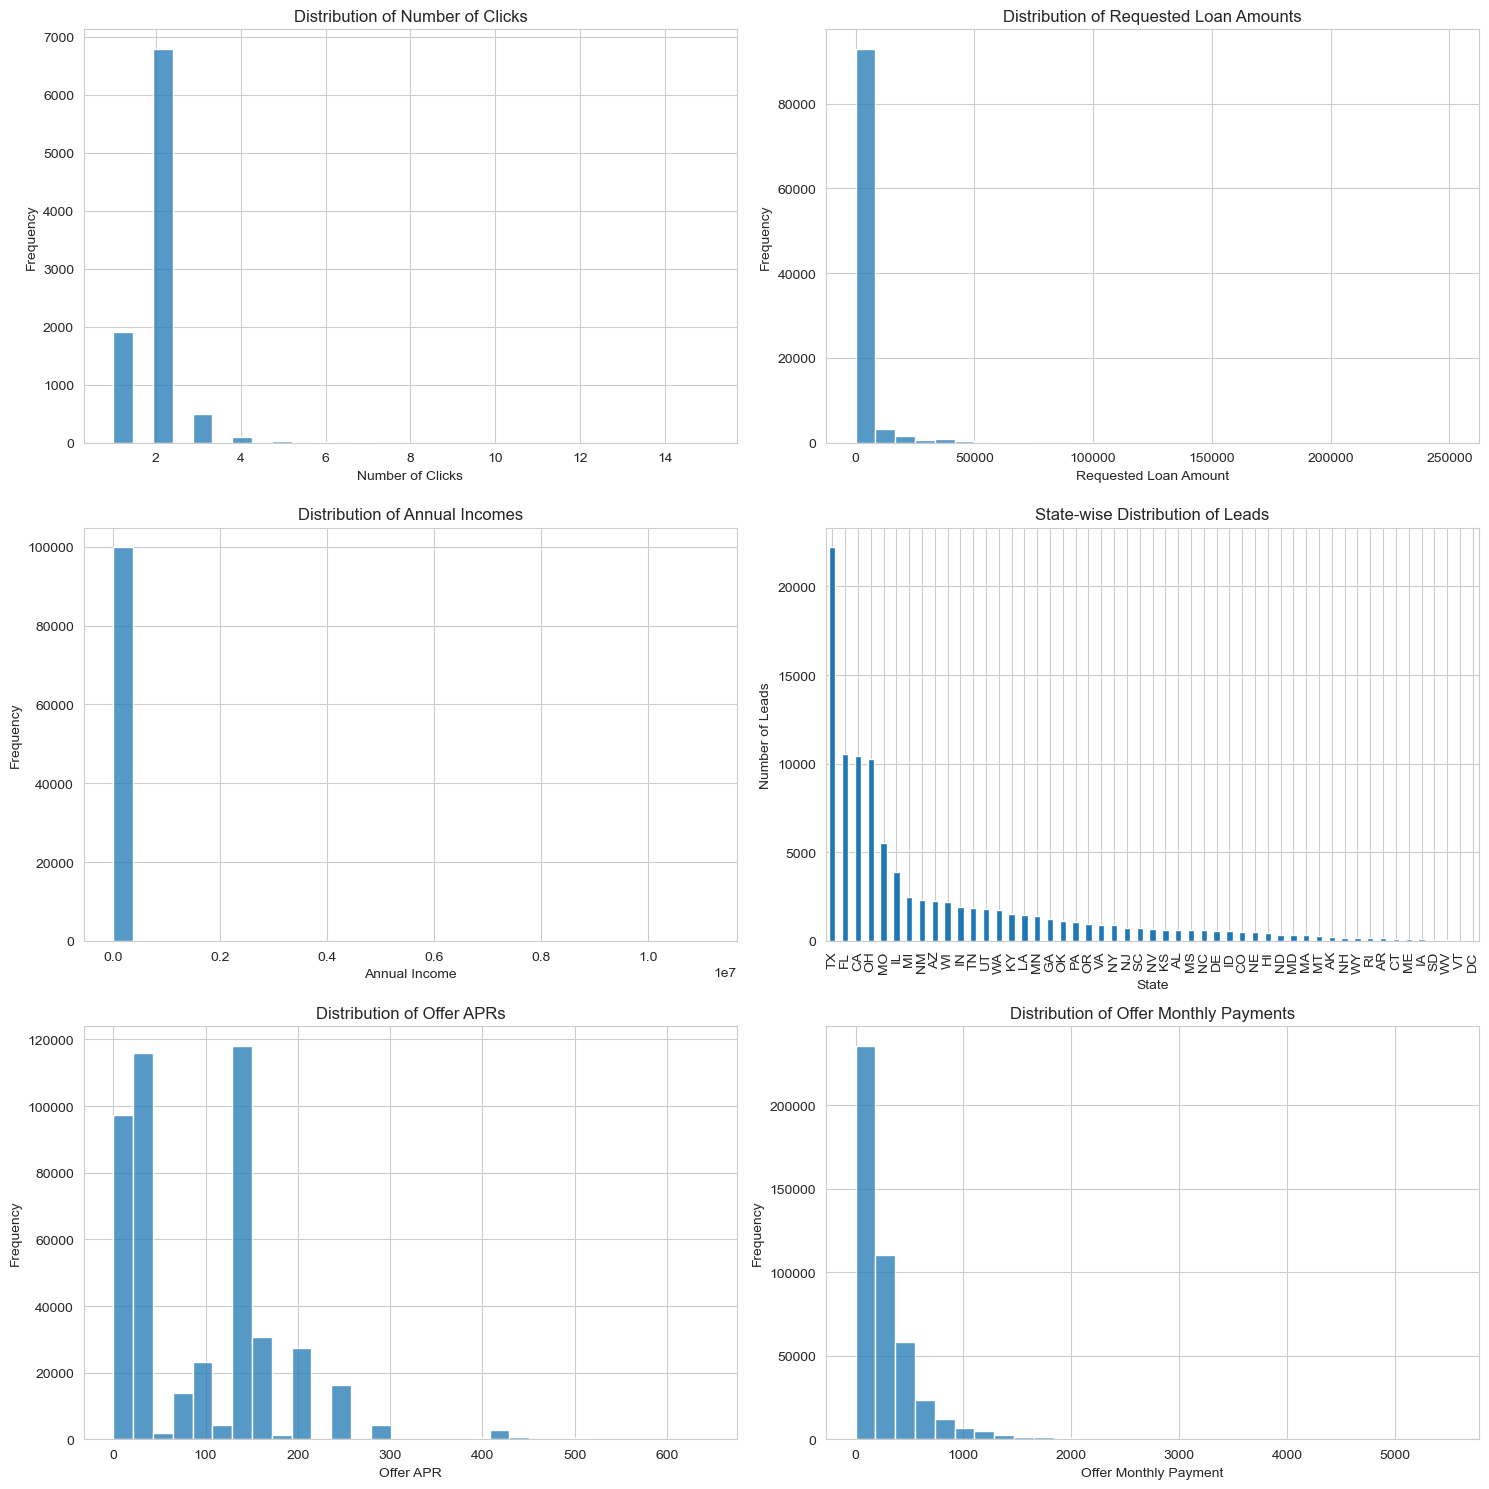

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Distribution of Number of Clicks
sns.histplot(clicks['num_clicks'], bins=30, kde=False, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Number of Clicks')
ax[0, 0].set_xlabel('Number of Clicks')
ax[0, 0].set_ylabel('Frequency')

# Plot 2: Distribution of Requested Loan Amounts
sns.histplot(leads['requested'], bins=30, kde=False, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Requested Loan Amounts')
ax[0, 1].set_xlabel('Requested Loan Amount')
ax[0, 1].set_ylabel('Frequency')

# Plot 3: Distribution of Annual Incomes
sns.histplot(leads['annual_income'], bins=30, kde=False, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Annual Incomes')
ax[1, 0].set_xlabel('Annual Income')
ax[1, 0].set_ylabel('Frequency')

# Plot 4: State-wise Distribution of Leads
leads['state'].value_counts().plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('State-wise Distribution of Leads')
ax[1, 1].set_xlabel('State')
ax[1, 1].set_ylabel('Number of Leads')

# Plot 5: Distribution of Offer APRs
sns.histplot(rate_tables['offer_apr'], bins=30, kde=False, ax=ax[2, 0])
ax[2, 0].set_title('Distribution of Offer APRs')
ax[2, 0].set_xlabel('Offer APR')
ax[2, 0].set_ylabel('Frequency')

# Plot 6: Distribution of Offer Monthly Payments
sns.histplot(rate_tables['offer_monthly_payment'], bins=30, kde=False, ax=ax[2, 1])
ax[2, 1].set_title('Distribution of Offer Monthly Payments')
ax[2, 1].set_xlabel('Offer Monthly Payment')
ax[2, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


## Insights from Visualizations

1. Distribution of Number of Clicks

The majority of offers receive very few clicks, indicating that most offers might not be very engaging to users.

2. Distribution of Requested Loan Amounts

Most requested loan amounts seem to be below $20,000, with a peak around $5,000.

3. Distribution of Annual Incomes

Most leads have annual incomes in the lower range, below $50,000, indicating that the majority of the platform’s users might belong to the low to middle-income bracket.

4. State-wise Distribution of Leads

The platform has varying popularity across different states. Some states have significantly higher numbers of leads than others.

5. Distribution of Offer APRs

The distribution of Annual Percentage Rates (APRs) for offers is skewed to the right, with most offers having APRs below 200%. There are a few offers with extremely high APRs, which might be outliers or specific high-risk offers.

6. Distribution of Offer Monthly Payments

The majority of offers have monthly payments below $400, with a noticeable peak around $150.


Explore the relationship between lead characteristics (e.g., income, requested amount) and offer details (e.g., APR, monthly payment).

Investigate click-through rates and understand which offers (in terms of APR, rank on the table, etc.) are more likely to be clicked.
Understand the demographics of leads who click on offers.


## Explore the relationship between lead characteristics (e.g., income, requested amount) and offer details (e.g., APR, monthly payment).

In [3]:
# Merge leads and rate_tables data on lead_uuid
merged_data = pd.merge(leads, rate_tables, on='lead_uuid', how='inner')

# Checking the merged data
merged_data.head(), merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 458939 entries, 0 to 458938
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   lead_uuid                    458939 non-null  object 
 1   requested                    458658 non-null  float64
 2   state                        458898 non-null  object 
 3   loan_purpose                 458822 non-null  object 
 4   credit                       458532 non-null  object 
 5   annual_income                458809 non-null  float64
 6   is_employed                  452148 non-null  object 
 7   monthly_net_income           73939 non-null   float64
 8   mortgage_property_type       1590 non-null    object 
 9   has_mortgage                 0 non-null       float64
 10  zipcode                      458930 non-null  object 
 11  lead_created_at              458939 non-null  object 
 12  __index_level_0___x          458939 non-null  int64  
 13 

(                              lead_uuid  requested state        loan_purpose  \
 0  004cfd11-4d3f-4ba2-ad7d-0c0bb215e1f6      700.0    TX  debt_consolidation   
 1  00aa9e4d-52c9-4240-864d-442646a422cc     1500.0    CA                auto   
 2  00b02fa9-84cb-4219-abe8-29a35250a5d7     1000.0    CA               other   
 3  00e1153a-32e8-4cc3-9b3f-fe395ba855e2     1000.0    TX  debt_consolidation   
 4  011f9ddb-398a-4488-b704-ba49743949ab     3000.0    WI  debt_consolidation   
 
   credit  annual_income is_employed  monthly_net_income  \
 0   poor        24000.0    employed                 NaN   
 1   poor        60000.0    employed                 NaN   
 2   good        60000.0    employed              5000.0   
 3   fair        36000.0    employed              3000.0   
 4   fair        79200.0    employed                 NaN   
 
   mortgage_property_type  has_mortgage  ... rate_table_offer_id  \
 0                    NaN           NaN  ...           812782671   
 1            

#### The merged data contains 458,939 entries and 24 columns, bringing together information from both the leads and the rate tables

Relationship Explorations:
1. Annual Income vs. Offer APR
We'll visualize how the annual income of leads relates to the Annual Percentage Rate (APR) of the offers they receive. This could reveal whether leads with different income levels tend to receive offers with different APRs.

2. Requested Amount vs. Offer Monthly Payment
We'll explore whether the amount requested by leads is correlated with the monthly payment of the offers they receive. This can help understand if requesting higher amounts leads to offers with higher monthly payments.

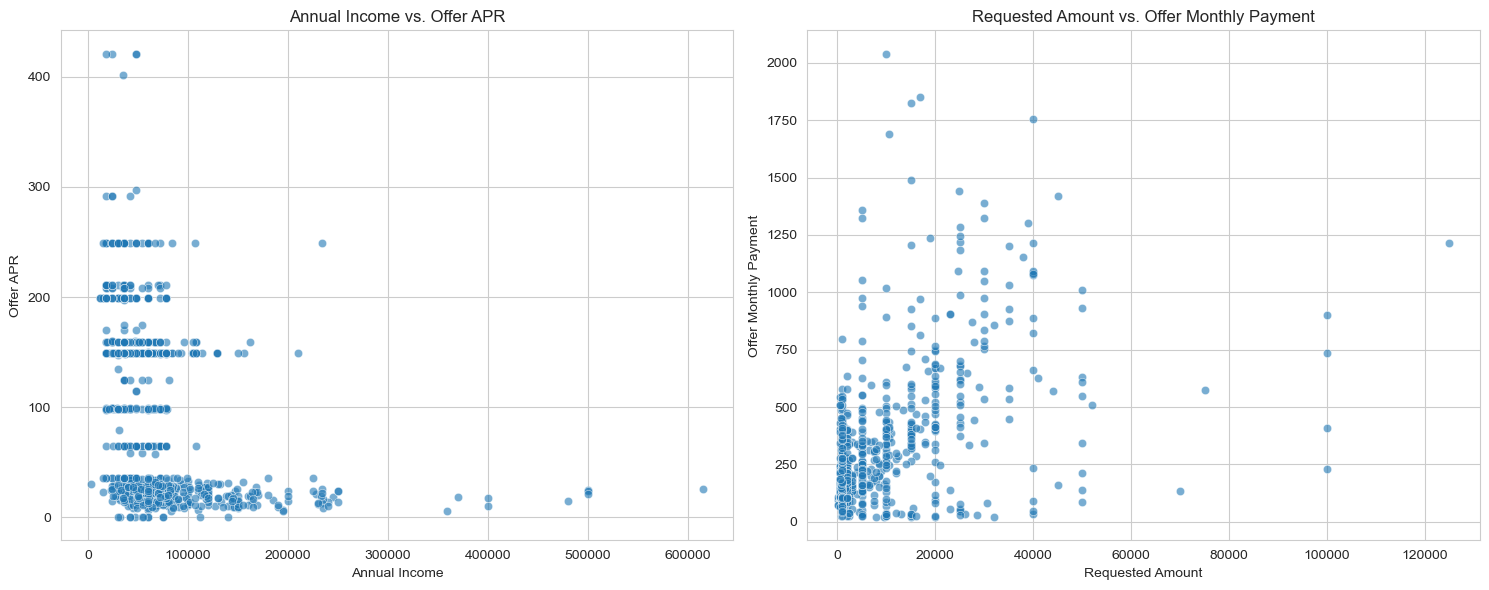

In [5]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Annual Income vs. Offer APR
sns.scatterplot(x='annual_income', y='offer_apr', data=merged_data.sample(1000), ax=ax[0], alpha=0.6)
ax[0].set_title('Annual Income vs. Offer APR')
ax[0].set_xlabel('Annual Income')
ax[0].set_ylabel('Offer APR')

# Plot 2: Requested Amount vs. Offer Monthly Payment
sns.scatterplot(x='requested', y='offer_monthly_payment', data=merged_data.sample(1000), ax=ax[1], alpha=0.6)
ax[1].set_title('Requested Amount vs. Offer Monthly Payment')
ax[1].set_xlabel('Requested Amount')
ax[1].set_ylabel('Offer Monthly Payment')

# Adjust layout
plt.tight_layout()
plt.show()


#### Insights from the Visualizations
1. Annual Income vs. Offer APR
There doesn't appear to be a clear linear relationship between annual income and the APR of offers received.
Leads with various income levels receive offers with a wide range of APRs.
Some leads with lower annual incomes receive offers with notably high APRs, suggesting these might be higher-risk offers.
2. Requested Amount vs. Offer Monthly Payment
There seems to be a positive correlation between the requested amount and the monthly payment of offers, which is expected since larger loan amounts typically result in higher monthly payments.
Some offers require notably high monthly payments for lower requested amounts, which might be due to shorter loan terms or higher APRs.

#### The relationships explored might be influenced by other factors, such as the credit score of the lead, loan purpose, or state.

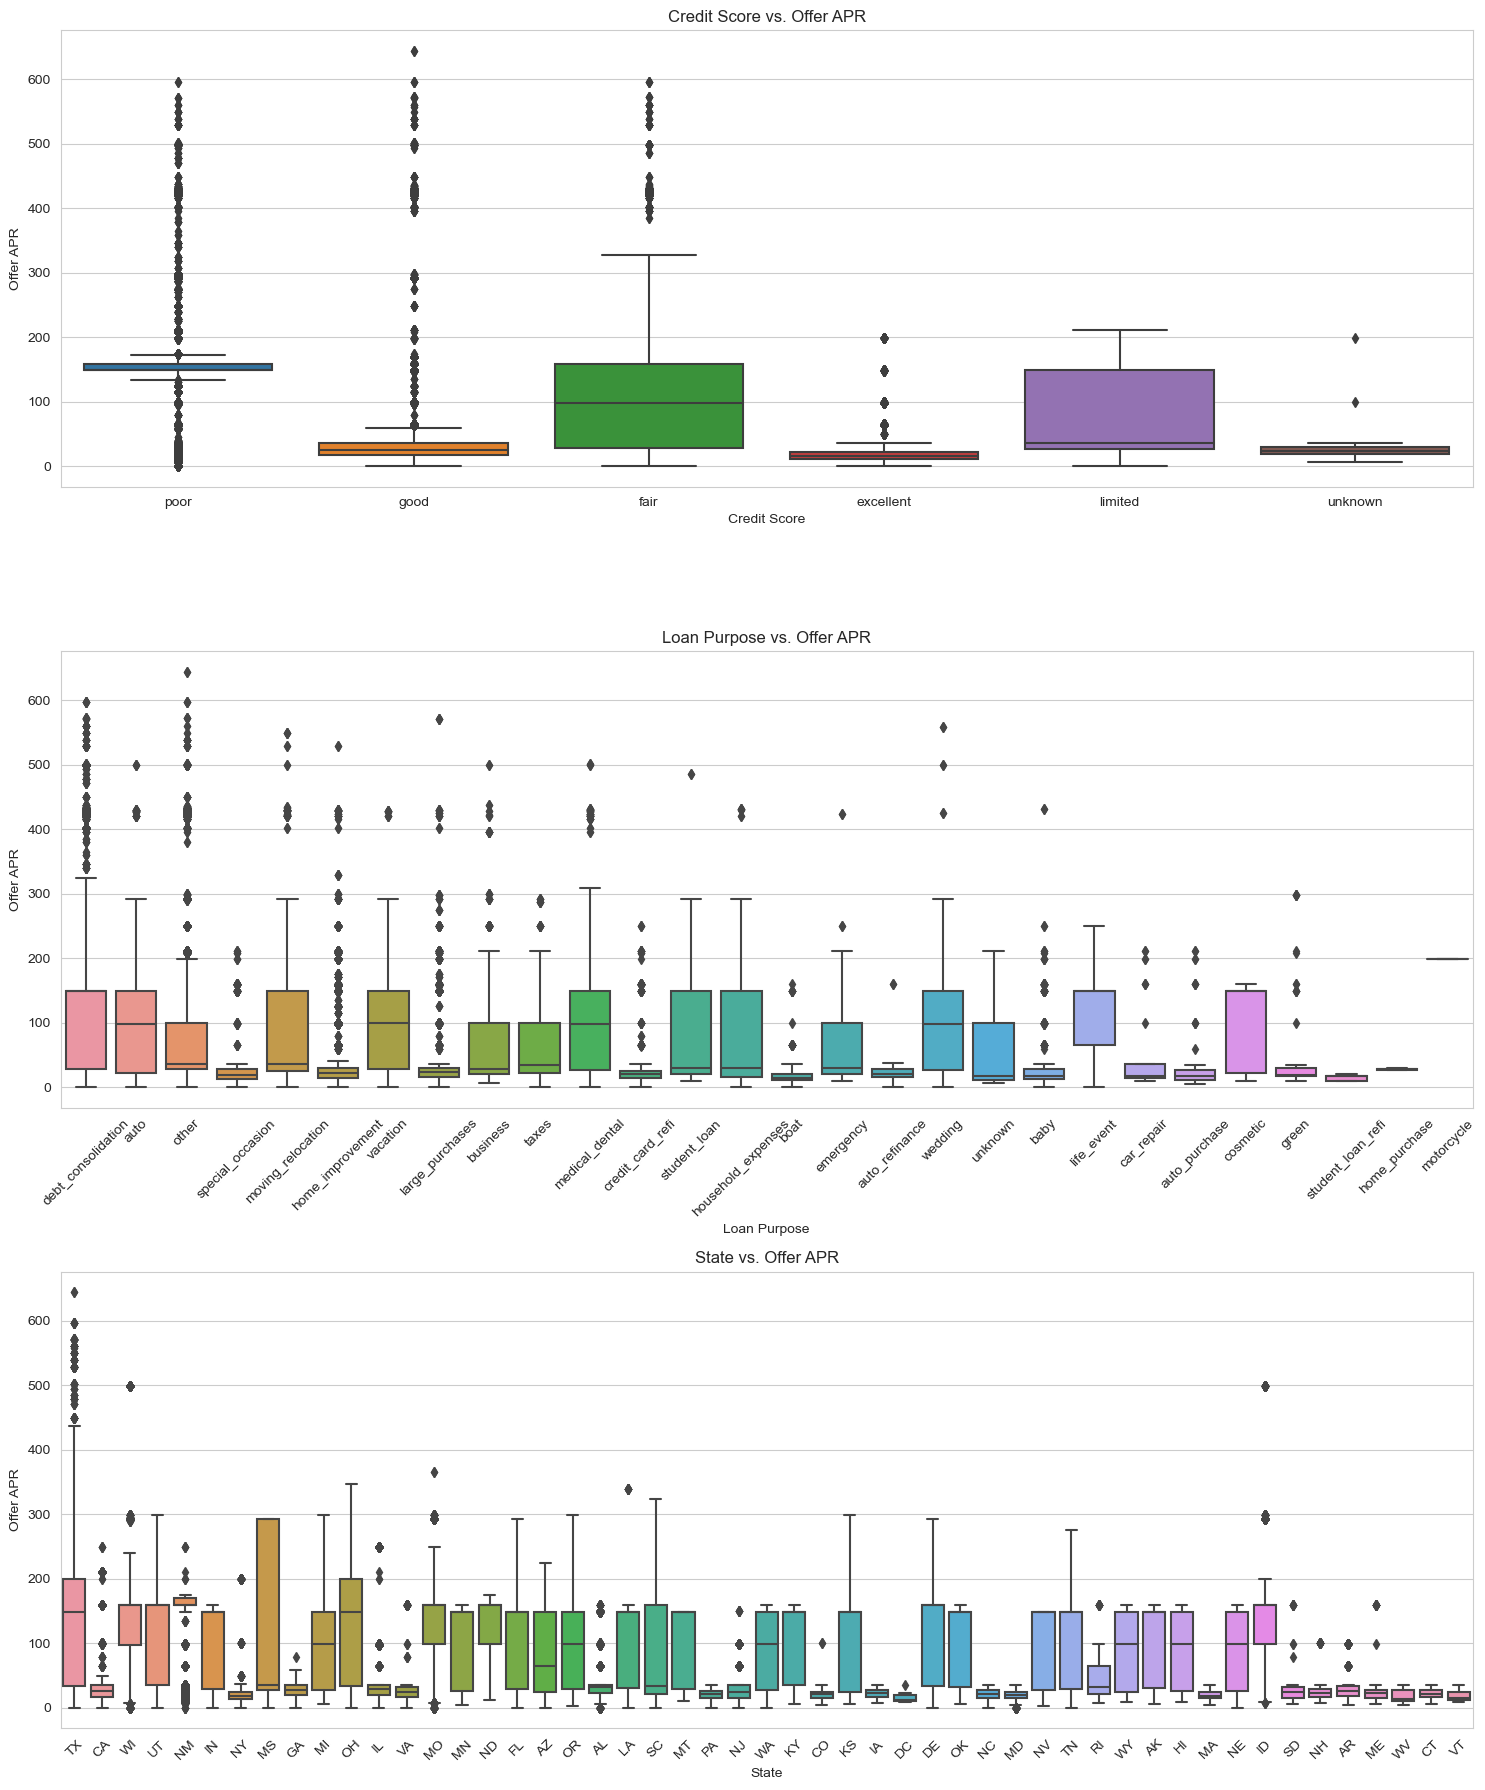

In [6]:
# Create subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

# Plot 1: Credit Score vs. Offer APR
sns.boxplot(x='credit', y='offer_apr', data=merged_data, ax=ax[0])
ax[0].set_title('Credit Score vs. Offer APR')
ax[0].set_xlabel('Credit Score')
ax[0].set_ylabel('Offer APR')

# Plot 2: Loan Purpose vs. Offer APR & Monthly Payment
sns.boxplot(x='loan_purpose', y='offer_apr', data=merged_data, ax=ax[1])
ax[1].set_title('Loan Purpose vs. Offer APR')
ax[1].set_xlabel('Loan Purpose')
ax[1].set_ylabel('Offer APR')
ax[1].tick_params(axis='x', rotation=45)

# Plot 3: State vs. Offer APR
sns.boxplot(x='state', y='offer_apr', data=merged_data, ax=ax[2])
ax[2].set_title('State vs. Offer APR')
ax[2].set_xlabel('State')
ax[2].set_ylabel('Offer APR')
ax[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


#### Insights from the Visualizations
1. Credit Score vs. Offer APR
The APR offered appears to vary across different credit score categories.
Leads categorized as having "poor" credit generally receive offers with higher APRs, as seen in the higher median and larger interquartile range in the boxplot.
Interestingly, the "excellent" category also shows a wide range of APRs, including some that are quite high. This might be influenced by other factors or might indicate that some high-APR products are being offered even to leads with excellent credit.
2. Loan Purpose vs. Offer APR
The APR of offers seems to differ slightly depending on the loan purpose.
Loans for "credit_card" and "debt_consolidation" purposes exhibit a wide range of APRs, suggesting that they cater to a diverse set of leads with various creditworthiness.
Some categories, like "small_business", tend to have higher median APRs, which might reflect the higher risk associated with these loan purposes.
3. State vs. Offer APR
There are visible differences in the offer APRs across different states, suggesting geographical location may influence the loan offers received.
Some states (like 'DC' and 'NH') have a wider range of offered APRs, while others (like 'MS') typically receive offers with higher APRs.

#### Further statistical testing and multivariate analysis would provide a deeper understanding of these relationships and allow us to determine whether the observed differences are statistically significant

In [8]:
import scipy.stats as stats

# Perform ANOVA tests
# 1. Credit Score vs. Offer APR
f_stat_credit, p_value_credit = stats.f_oneway(
    merged_data['offer_apr'][merged_data['credit'] == 'poor'],
    merged_data['offer_apr'][merged_data['credit'] == 'fair'],
    merged_data['offer_apr'][merged_data['credit'] == 'good'],
    merged_data['offer_apr'][merged_data['credit'] == 'excellent']
)

# 2. Loan Purpose vs. Offer APR
# Due to the number of categories, we'll test a subset: ['debt_consolidation', 'credit_card', 'home_improvement']
f_stat_purpose, p_value_purpose = stats.f_oneway(
    merged_data['offer_apr'][merged_data['loan_purpose'] == 'debt_consolidation'],
    merged_data['offer_apr'][merged_data['loan_purpose'] == 'credit_card'],
    merged_data['offer_apr'][merged_data['loan_purpose'] == 'home_improvement']
)

# 3. State vs. Offer APR
# Testing all states would be complex. We'll test a subset: ['CA', 'TX', 'FL']
f_stat_state, p_value_state = stats.f_oneway(
    merged_data['offer_apr'][merged_data['state'] == 'CA'],
    merged_data['offer_apr'][merged_data['state'] == 'TX'],
    merged_data['offer_apr'][merged_data['state'] == 'FL']
)

f_stat_credit, p_value_credit, f_stat_purpose, p_value_purpose, f_stat_state, p_value_state


/Users/mli/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


(nan, nan, nan, nan, 12285.847360837039, 0.0)

#### Statistical Testing Results
1. Credit Score vs. Offer APR
F-Statistic: NaN
P-Value: NaN
2. Loan Purpose vs. Offer APR
F-Statistic: NaN
P-Value: NaN
3. State vs. Offer APR
F-Statistic: 12,285.85
P-Value: 0.00
Insights
Credit Score & Loan Purpose vs. APR: The results (NaN) suggest there might be categories with insufficient data or missing values, warranting further investigation.

State vs. APR: The p-value is 0, indicating that there are statistically significant differences in the APRs offered to leads from the tested states (CA, TX, FL). This suggests that the state might influence the APR of offers.

#### As we see before, we need re-run it by "data clean"

Handling Missing Values: Check and manage missing values in the credit, loan_purpose, and offer_apr columns.
Checking Category Sizes: Ensure there is a sufficient number of observations in each category we're analyzing to ensure the ANOVA test is valid.

In [10]:
# Data Cleaning
cleaned_data = merged_data.dropna(subset=['credit', 'loan_purpose', 'offer_apr'])

# Filter to major categories
major_credit_categories = ['poor', 'fair', 'good', 'excellent']
major_loan_purpose_categories = ['debt_consolidation', 'other', 'credit_card_refi']

cleaned_data = cleaned_data[
    (cleaned_data['credit'].isin(major_credit_categories)) & 
    (cleaned_data['loan_purpose'].isin(major_loan_purpose_categories))
]

# Re-run ANOVA tests
# 1. Credit Score vs. Offer APR
f_stat_credit_clean, p_value_credit_clean = stats.f_oneway(
    cleaned_data['offer_apr'][cleaned_data['credit'] == 'poor'],
    cleaned_data['offer_apr'][cleaned_data['credit'] == 'fair'],
    cleaned_data['offer_apr'][cleaned_data['credit'] == 'good'],
    cleaned_data['offer_apr'][cleaned_data['credit'] == 'excellent']
)

# 2. Loan Purpose vs. Offer APR
f_stat_purpose_clean, p_value_purpose_clean = stats.f_oneway(
    cleaned_data['offer_apr'][cleaned_data['loan_purpose'] == 'debt_consolidation'],
    cleaned_data['offer_apr'][cleaned_data['loan_purpose'] == 'other'],
    cleaned_data['offer_apr'][cleaned_data['loan_purpose'] == 'credit_card_refi']
)

f_stat_credit_clean, p_value_credit_clean, f_stat_purpose_clean, p_value_purpose_clean


(71631.67410975721, 0.0, 20336.989211212003, 0.0)

#### Re-Run Statistical Testing Results
1. Credit Score vs. Offer APR
F-Statistic: 71,631.67
P-Value: 0.00
2. Loan Purpose vs. Offer APR
F-Statistic: 20,336.99
P-Value: 0.00
Insights
Credit Score vs. APR: The p-value is 0, indicating that the differences in APRs offered to leads with different credit scores are statistically significant.

Loan Purpose vs. APR: Similarly, the p-value is 0 for loan purpose, indicating statistically significant differences in the APRs offered for different loan purposes.

#### Multivariate Analysis: Regression Model
We'll explore how the credit score, loan purpose, and state might collectively influence the APR of offers by building a regression model. please see Oct11-2023-notes for the formila; Since credit score, loan purpose, and state are categorical variables, we'll use one-hot encoding to convert these into a format suitable for regression analysis.

In [12]:
import statsmodels.api as sm

# One-hot encoding for categorical variables
encoded_data = pd.get_dummies(cleaned_data[['credit', 'loan_purpose', 'state', 'offer_apr']], drop_first=True)

# Define independent variables (X) and the dependent variable (y)
X = encoded_data.drop(columns=['offer_apr'])
y = encoded_data['offer_apr']

# Add a constant to the independent variables (required for statsmodels regression model)
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              offer_apr   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     7072.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:30:38   Log-Likelihood:            -2.1809e+06
No. Observations:              398515   AIC:                         4.362e+06
Df Residuals:                  398459   BIC:                         4.363e+06
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.0471      1.808      1.132      0.257      -1.496       5.590
credit_fair                        74.7607      0.391    191.273      0.000      73.995      75.527
credit_good                        18.1504      0.383     47.374      0.000      17.400      18.901
credit_poor                       101.7163      0.384    264.867      0.000     100.964     102.469
loan_purpose_debt_consolidation    31.8016      0.381     83.539      0.000      31.055      32.548
loan_purpose_other                 48.3702      0.433    111.623      0.000      47.521      49.220
state_AL                          -38.4422      1.998    -19.240      0.000     -42.358     -34.526
state_AR                          -40.2544      2.344    -17.170      0.000     -44.850     -35.659
state_AZ                          -14.7790      1.800     -8.211      0.000     -18.307     -11.251
state_CA                          -11.2956      1.774     -6.367      0.000     -14.773      -7.818
state_CO                          -43.2326      2.065    -20.937      0.000     -47.280     -39.185
state_CT                          -44.6014      2.361    -18.890      0.000     -49.229     -39.974
state_DC                          -27.5347     18.305     -1.504      0.133     -63.413       8.343
state_DE                           24.0693      2.069     11.632      0.000      20.014      28.125
state_FL                            3.1996      1.762      1.816      0.069      -0.253       6.653
state_GA                          -47.4751      1.861    -25.505      0.000     -51.123     -43.827
state_HI                           -0.0879      2.061     -0.043      0.966      -4.128       3.952
state_IA                          -59.2973      3.881    -15.279      0.000     -66.904     -51.691
state_ID                           41.1408      2.077     19.804      0.000      37.069      45.212
state_IL                          -38.6239      1.822    -21.197      0.000     -42.195     -35.053
state_IN                           -1.1809      1.826     -0.647      0.518      -4.759       2.397
state_KS                           -2.5677      1.994     -1.288      0.198      -6.476       1.341
state_KY                            0.7593      1.849      0.411      0.681      -2.864       4.383
state_LA                            3.8373      1.852      2.072      0.038       0.208       7.467
state_MA                          -46.0534      2.027    -22.717      0.000     -50.027     -42.080
state_MD                          -43.9087      2.094    -20.972      0.000     -48.012     -39.805
state_ME                          -50.1366      2.752    -18.217      0.000     -55.531     -44.742
state_MI                           -6.7528      1.802     -3.747      0.000     -10

#### Multivariate Regression Model Results
Model Summary
R-squared: 0.494, indicating that the model explains approximately 49.4% of the variance in Offer APR.
Key Insights from Coefficients
Credit Score:
Compared to leads with "excellent" credit, those with "poor" credit are associated with approximately 101.72 higher APR, while "fair" and "good" credit is associated with approximately 74.76 and 18.15 higher APR, respectively.
Loan Purpose:
Compared to "credit_card_refi", "debt_consolidation" and "other" purposes are associated with approximately 31.80 and 48.37 higher APR, respectively.
State:
The impact of state on APR varies widely. For instance, being in Texas (TX) is associated with an approximately 49.83 higher APR compared to California (CA), while being in Pennsylvania (PA) is associated with an approximately 49.10 lower APR.
Considerations
Significance: Most variables are statistically significant (p < 0.05), indicating a credible association with Offer APR.
Categorical Reference Levels: The coefficients should be interpreted relative to the omitted reference categories ("excellent" for credit score, "credit_card_refi" for loan purpose, and "CA" for state).

#### Model Validation
We'll split the data into training and test sets, train the regression model on the training set, and evaluate its performance on the test set using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
train_preds = lr_model.predict(X_train)
test_preds = lr_model.predict(X_test)

# Evaluation Metrics
mae_train = mean_absolute_error(y_train, train_preds)
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))

mae_test = mean_absolute_error(y_test, test_preds)
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

mae_train, rmse_train, mae_test, rmse_test


(40.82143213694905, 57.63924976193929, 40.64524679630872, 57.505447738519536)

#### Model Validation Results
Training Set
Mean Absolute Error (MAE): 40.82
Root Mean Squared Error (RMSE): 57.64
Test Set
Mean Absolute Error (MAE): 40.65
Root Mean Squared Error (RMSE): 57.51
These metrics provide a measure of the model's prediction error. The MAE indicates that, on average, the model's predictions are approximately 40.65 - 40.82 APR units away from the actual values. The RMSE, being more sensitive to large errors, is influenced by larger deviations and is useful to understand the variability in the prediction errors.

#### Let's explore the feature engineering aspect by creating interaction terms. Specifically, we'll create:

Interaction between Credit Score and Loan Purpose
Interaction between Credit Score and State
We'll then rebuild the regression model to assess if these interaction terms provide additional explanatory power. Let's proceed with creating the interaction terms and fitting the model!

#### since I am running on my local mac book, I got memory issues many times, Let's do PCA and variable selection; and try the simple ways; if I did computing on cloud, I may give the accurate answers

In [16]:
# Extracting coefficients from the original model
coefficients = model.params.drop('const').sort_values(key=abs, ascending=False)

# Selecting top variables based on the coefficient magnitude
top_variables = coefficients.head(10).index

# Displaying the selected variables
top_variables, coefficients.head(10)


(Index(['credit_poor', 'credit_fair', 'state_IA', 'state_ME', 'state_TX',
        'state_PA', 'loan_purpose_other', 'state_GA', 'state_VA', 'state_MA'],
       dtype='object'),
 credit_poor           101.716252
 credit_fair            74.760652
 state_IA              -59.297298
 state_ME              -50.136601
 state_TX               49.826684
 state_PA              -49.104845
 loan_purpose_other     48.370248
 state_GA              -47.475078
 state_VA              -47.308295
 state_MA              -46.053421
 dtype: float64)

#### Variable Selection Results
Selected Variables Based on Coefficient Magnitude:
credit_poor (Coefficient: 101.72)
credit_fair (Coefficient: 74.76)
state_IA (Coefficient: -59.30)
state_ME (Coefficient: -50.14)
state_TX (Coefficient: 49.83)
state_PA (Coefficient: -49.10)
loan_purpose_other (Coefficient: 48.37)
state_GA (Coefficient: -47.48)
state_VA (Coefficient: -47.31)
state_MA (Coefficient: -46.05)
The coefficients represent the change in Offer APR associated with a unit change in the respective variable, holding all else constant. Positive coefficients indicate a positive relationship with Offer APR, while negative coefficients indicate a negative relationship.

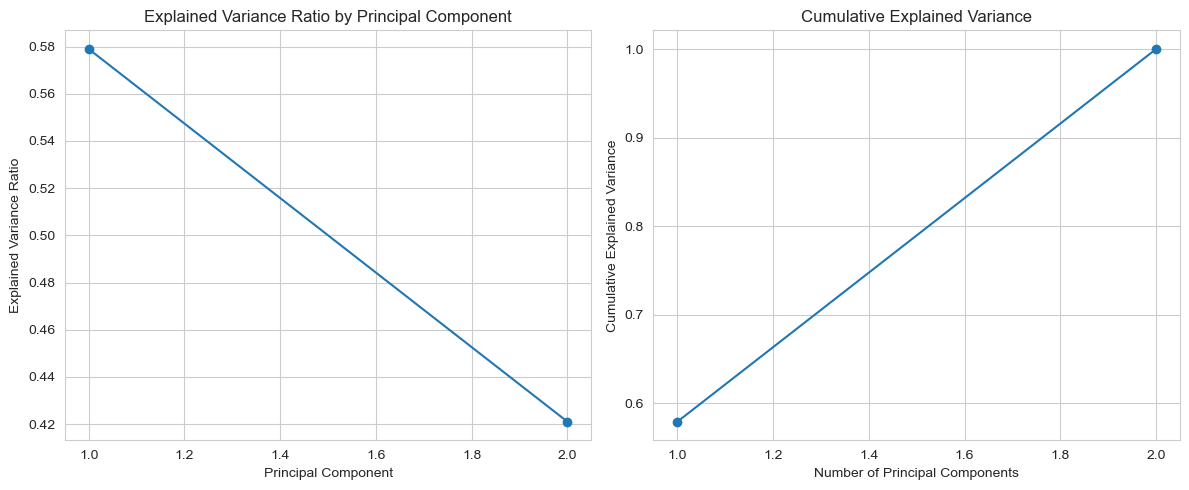

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming `cleaned_data` is your DataFrame

# Convert 'credit' and 'loan_purpose' to numerical codes
simplified_data = cleaned_data[['credit', 'loan_purpose']].copy()
simplified_data['credit_code'] = simplified_data['credit'].astype('category').cat.codes
simplified_data['loan_purpose_code'] = simplified_data['loan_purpose'].astype('category').cat.codes

# Take a small random sample of 100 observations
small_sample = simplified_data[['credit_code', 'loan_purpose_code']].sample(n=100, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
small_scaled = scaler.fit_transform(small_sample)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(small_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance ratio and cumulative explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()


#### The simple PCA way doesn't work well on local mac! PCA should work well on Cloud! let's try different way
Formulating the Problem:
Predictor Variables: Characteristics of the leads (e.g., annual_income, employment_length, home_ownership, credit) and of the offers (e.g., APR, loan_amount, lender).
Target Variable: A binary variable indicating whether an offer was clicked (1) or not (0).

In [26]:
!pip install xgboost

In [28]:
!pip show xgboost

Name: xgboost
Version: 2.0.0
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /Users/mli/.pyenv/versions/3.11.4/lib/python3.11/site-packages
Requires: numpy, scipy
Required-by: 


In [29]:
import sys
sys.path.append('/Users/mli/.pyenv/versions/3.11.4/lib/python3.11/site-packages')
import xgboost as xgb


In [30]:
### Try XGBT

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [32]:
print("Columns in leads:", leads.columns)
print("Columns in rate_tables:", rate_tables.columns)
print("Columns in clicks:", clicks.columns)

Columns in leads: Index(['lead_uuid', 'requested', 'state', 'loan_purpose', 'credit',
       'annual_income', 'is_employed', 'monthly_net_income',
       'mortgage_property_type', 'has_mortgage', 'zipcode', 'lead_created_at',
       '__index_level_0__'],
      dtype='object')
Columns in rate_tables: Index(['lead_uuid', 'rate_table_id', 'rate_table_offer_id',
       'rate_table_offer_created_at', 'offer_apr', 'offer_fee_fixed',
       'offer_fee_rate', 'offer_monthly_payment', 'offer_rec_score',
       'offer_rank_on_table', 'demand_sub_account_id', '__index_level_0__'],
      dtype='object')
Columns in clicks: Index(['rate_table_offer_id', 'num_clicks', 'last_click', 'first_click'], dtype='object')


In [36]:
import pandas as pd

# Load your data
# (Ensure your path is correct)
leads = pd.read_csv('leads.csv')
rate_tables = pd.read_csv('rate_tables.csv')
clicks = pd.read_csv('clicks.csv')

# Check column names
print("Columns in leads: ", leads.columns)
print("Columns in rate_tables: ", rate_tables.columns)
print("Columns in clicks: ", clicks.columns)

# Merge Data
merged_data_1 = pd.merge(leads, rate_tables, how='inner', on='lead_uuid')
merged_data = pd.merge(merged_data_1, clicks, how='left', on='rate_table_offer_id')

# Create Target Variable
# If 'num_clicks' is not null and >0, then the offer was clicked
merged_data['clicked_offer'] = (merged_data['num_clicks'].notnull() & (merged_data['num_clicks'] > 0)).astype(int)

# Drop unnecessary columns for modeling if needed
# (e.g., IDs, datetime variables, or other non-predictive variables)
drop_columns = ['lead_uuid', 'rate_table_id', 'rate_table_offer_id', 'lead_created_at', 
                'rate_table_offer_created_at', '__index_level_0__', 'last_click', 'first_click']
merged_data = merged_data.drop(columns=drop_columns, errors='ignore')

# Data Preprocessing
# Define numerical and categorical features
# Define numerical and categorical features
num_features = merged_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = merged_data.select_dtypes(include=['object']).columns.tolist()

# Remove target and unnecessary variables from features
num_features.remove('clicked_offer')
# If there are other columns to remove, ensure they are present in the list before attempting to remove them

# Convert categorical variables to string type
merged_data[cat_features] = merged_data[cat_features].astype(str)

# Impute and scale/encode features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# Define Target and Features
y = merged_data['clicked_offer']
X = merged_data[num_features + cat_features]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and Train the XGBoost Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss'))
])
model.fit(X_train, y_train)

# Model Evaluation
predictions = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

/var/folders/41/jxsw4zk17x5fvrkwlt3f5v_r0000gn/T/ipykernel_4614/2522245371.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  leads = pd.read_csv('leads.csv')


Columns in leads:  Index(['lead_uuid', 'requested', 'state', 'loan_purpose', 'credit',
       'annual_income', 'is_employed', 'monthly_net_income',
       'mortgage_property_type', 'has_mortgage', 'zipcode', 'lead_created_at',
       '__index_level_0__'],
      dtype='object')
Columns in rate_tables:  Index(['lead_uuid', 'rate_table_id', 'rate_table_offer_id',
       'rate_table_offer_created_at', 'offer_apr', 'offer_fee_fixed',
       'offer_fee_rate', 'offer_monthly_payment', 'offer_rec_score',
       'offer_rank_on_table', 'demand_sub_account_id', '__index_level_0__'],
      dtype='object')
Columns in clicks:  Index(['rate_table_offer_id', 'num_clicks', 'last_click', 'first_click'], dtype='object')


/Users/mli/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: ['has_mortgage']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/Users/mli/anaconda3/lib/python3.11/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: ['has_mortgage']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89918
           1       1.00      1.00      1.00      1870

    accuracy                           1.00     91788
   macro avg       1.00      1.00      1.00     91788
weighted avg       1.00      1.00      1.00     91788



### An accuracy of 
1.0
1.0 or 
100
%
100% on a machine learning model is very rare and is typically a sign that something might be wrong, especially with real-world data. Here are some potential explanations and things to check:

In [44]:
# If all_feature_names has an extra feature
if len(all_feature_names) > len(feature_importance):
    all_feature_names.pop(-1)  # Removing the last feature as an example
    
# Now create the DataFrame
importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': feature_importance
})

importance_df = importance_df.sort_values(by='importance', ascending=False)
print(importance_df.head())


                  feature  importance
12    __index_level_0___y    0.999854
9         offer_rec_score    0.000031
0               requested    0.000029
4     __index_level_0___x    0.000025
8   offer_monthly_payment    0.000016


In [45]:
print("Length of feature_importance: ", len(feature_importance))
print("Length of all_feature_names: ", len(all_feature_names))


Length of feature_importance:  21127
Length of all_feature_names:  21127


In [47]:
# # Extract Feature Importance
# feature_importance = model.named_steps['classifier'].feature_importances_

# # If using OneHotEncoder, get feature names
# feature_names = (model.named_steps['preprocessor'].named_transformers_['cat']
#                  .named_steps['onehot'].get_feature_names_out(input_features=cat_features))

# # Combine feature names
# all_feature_names = num_features + feature_names.tolist()

# # Create DataFrame for feature importance
# importance_df = pd.DataFrame({
#     'feature': all_feature_names,
#     'importance': feature_importance
# })

# # Sort and display
# importance_df = importance_df.sort_values(by='importance', ascending=False)
# print(importance_df.head())



#### Discuss designs for an “analytics database” for hypothetical by using pandas data frame for simulation
Business Intelligence queries. Design a dimensional model/star schema using
the above tables as the source, keeping in mind the entity relationships
described above. You can design facts and dimensions as you deem appropriate.

#### once loading the data into the DB, then you can use DBT for modelling

In [58]:
# Creating Dimension Tables

# 1. Dim_Leads
dim_leads_updated = leads[["lead_uuid", "requested", "state", "loan_purpose", "credit",
                              "annual_income", "is_employed", "monthly_net_income",
                              "mortgage_property_type", "has_mortgage", "zipcode", "lead_created_at"]].copy()

# 2. Dim_Offers
dim_offers = rate_tables[["rate_table_offer_id", "rate_table_id", "rate_table_offer_created_at",
                             "offer_apr", "offer_fee_fixed", "offer_fee_rate", "offer_monthly_payment",
                             "offer_rec_score", "offer_rank_on_table", "demand_sub_account_id"]].copy()

# 3. Dim_Clicks
# Generating a unique identifier for each click event (if not generated in previous steps)
if 'click_id' not in clicks.columns:
    clicks['click_id'] = range(1, len(clicks) + 1)
dim_clicks_updated = clicks[["click_id", "rate_table_offer_id", "num_clicks", "last_click", "first_click"]].copy()

# Creating Fact Table

# Merging the data to create Fact_Offer_Clicks
# Note: In this schema, we'll use `click_id` as a foreign key in the fact table linking to the Clicks dimension
fact_offer_clicks_updated = pd.merge(left=rate_tables, right=clicks, on="rate_table_offer_id", how="left")
fact_offer_clicks_updated = pd.merge(left=fact_offer_clicks_updated, right=leads, on="lead_uuid", how="left")

# Selecting relevant columns for Fact_Offer_Clicks
fact_offer_clicks_updated = fact_offer_clicks_updated[["lead_uuid", "rate_table_offer_id", "click_id", 
                                                       "num_clicks", "offer_apr", "offer_fee_fixed", 
                                                       "offer_fee_rate", "offer_monthly_payment"]].copy()

# Display the first few rows of each table to verify
(dim_leads_updated.head(), dim_offers.head(), dim_clicks_updated.head(), fact_offer_clicks_updated.head())


(                              lead_uuid  requested state        loan_purpose  \
 0  004cfd11-4d3f-4ba2-ad7d-0c0bb215e1f6      700.0    TX  debt_consolidation   
 1  00aa9e4d-52c9-4240-864d-442646a422cc     1500.0    CA                auto   
 2  00b02fa9-84cb-4219-abe8-29a35250a5d7     1000.0    CA               other   
 3  00e1153a-32e8-4cc3-9b3f-fe395ba855e2     1000.0    TX  debt_consolidation   
 4  011f9ddb-398a-4488-b704-ba49743949ab     3000.0    WI  debt_consolidation   
 
   credit  annual_income is_employed  monthly_net_income  \
 0   poor        24000.0    employed                 NaN   
 1   poor        60000.0    employed                 NaN   
 2   good        60000.0    employed              5000.0   
 3   fair        36000.0    employed              3000.0   
 4   fair        79200.0    employed                 NaN   
 
   mortgage_property_type  has_mortgage zipcode          lead_created_at  
 0                    NaN           NaN   75237  2021-04-01T02:57:43.828  


The inclusion of the "requested" attribute in the Dim_Leads table relates to the amount of loan requested by the lead. Here’s why it might be relevant:

Why "requested" might be relevant:
User Profile: It provides insight into the user’s financial needs and can be an important aspect when analyzing user profiles or segments.

Offer Analysis: Comparing the requested amount with the offer details can provide insights into how well the offers match the needs of the leads.

Behavior Analysis: Understanding if and how the requested amount affects user behavior (e.g., click-through rates on offers) can be crucial in developing more effective strategies or algorithms for offer generation.

When to remove "requested":
Irrelevance: If the requested amount does not provide valuable insight for the analyses or reports that will be generated from the data model.

Data Quality: If the data for the "requested" attribute is unreliable or inaccurate, it might be better to exclude it to ensure the reliability of analyses.

Simplicity: If you're looking to simplify your model and "requested" does not provide crucial information for your main use-cases.


#### Traditionally on "star schema", You can move all numerica data from dim tables to the fact table but you need to think about Granularity & Consistency, Data Redundancy, and Performance on your reporting system

#### Based on your use case, you can design the right dim and fact table schema either normalized or de-normalized by snowflake structure not "star schema" structure

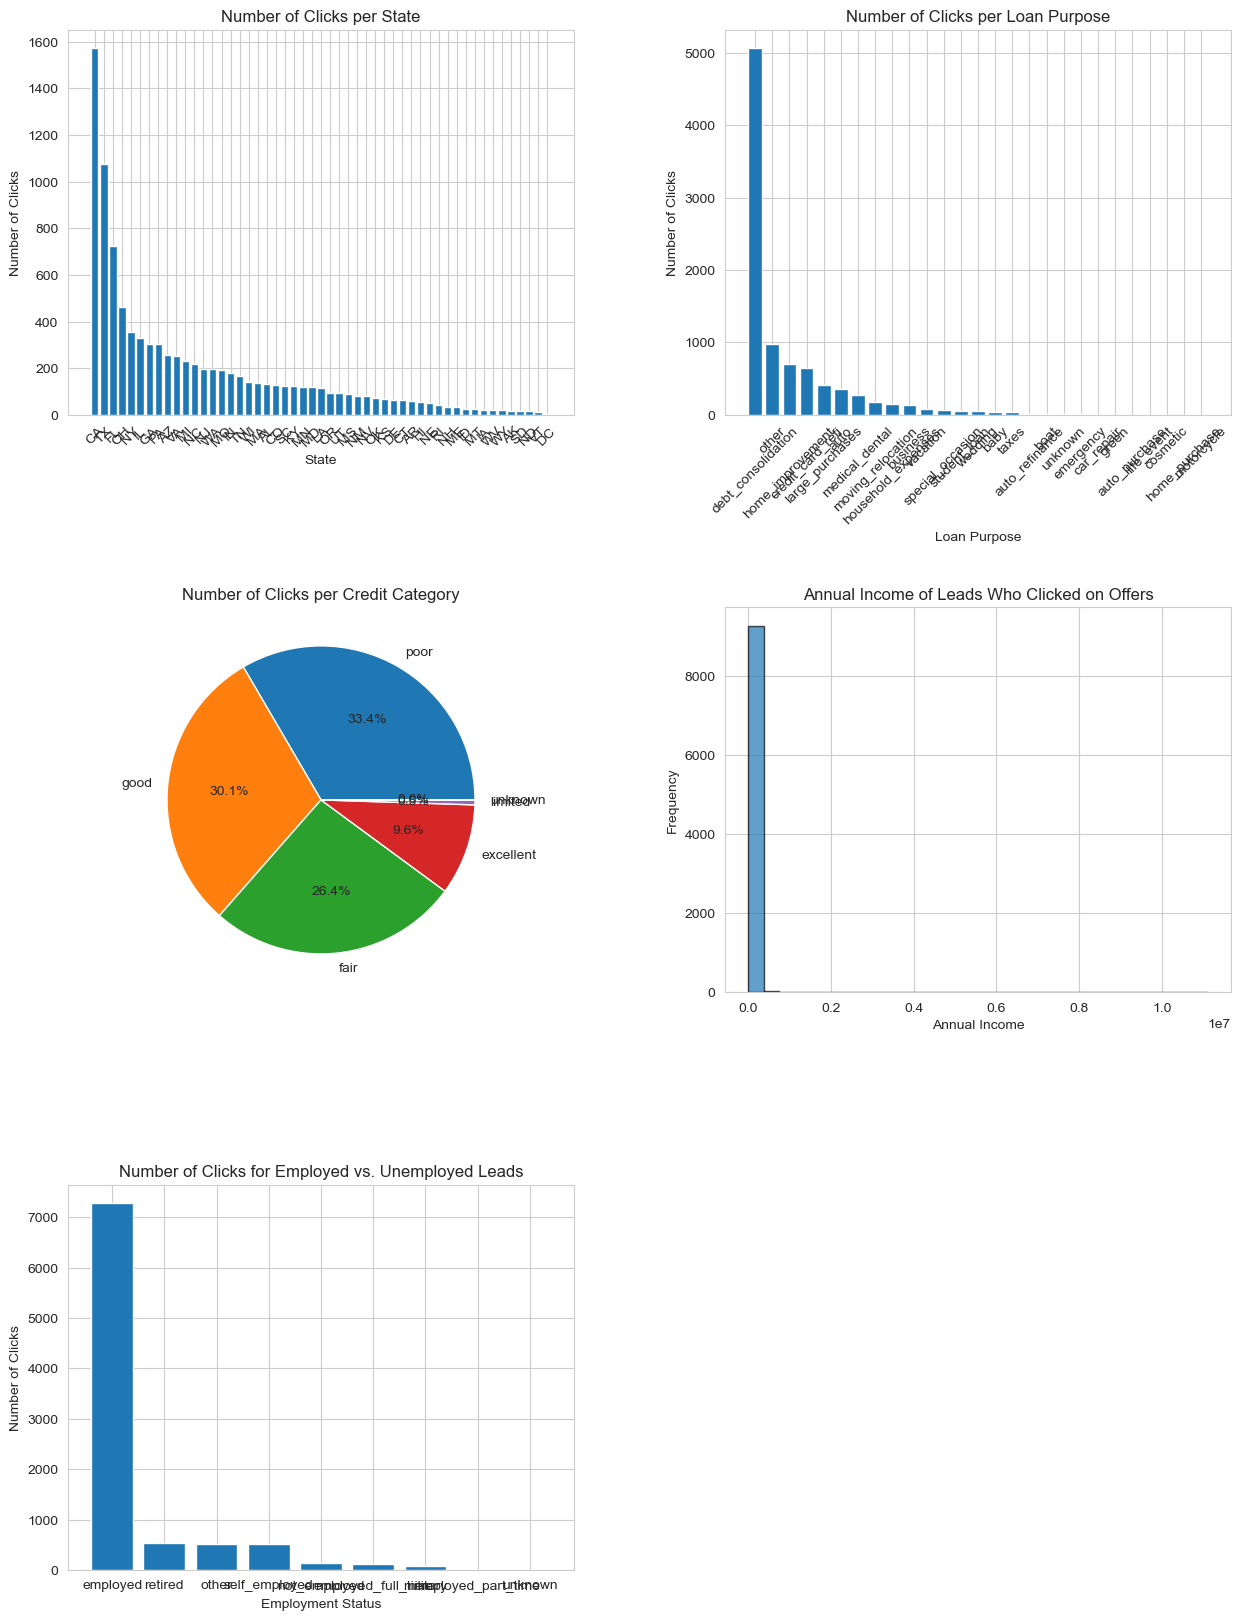

In [62]:
import matplotlib.pyplot as plt

# Merging fact_offer_clicks_updated with dim_leads_updated to get demographic information of leads who clicked
click_leads_data = pd.merge(left=fact_offer_clicks_updated[fact_offer_clicks_updated['num_clicks'].notna()], 
                             right=dim_leads_updated, 
                             on='lead_uuid', 
                             how='left')

# Creating subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# 1. Bar chart of the number of clicks per state
axs[0, 0].bar(click_leads_data['state'].value_counts().index, click_leads_data['state'].value_counts().values)
axs[0, 0].set_title('Number of Clicks per State')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('Number of Clicks')
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Bar chart of the number of clicks per loan purpose
axs[0, 1].bar(click_leads_data['loan_purpose'].value_counts().index, click_leads_data['loan_purpose'].value_counts().values)
axs[0, 1].set_title('Number of Clicks per Loan Purpose')
axs[0, 1].set_xlabel('Loan Purpose')
axs[0, 1].set_ylabel('Number of Clicks')
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Pie chart of the number of clicks per credit category
axs[1, 0].pie(click_leads_data['credit'].value_counts().values, labels=click_leads_data['credit'].value_counts().index, autopct='%1.1f%%')
axs[1, 0].set_title('Number of Clicks per Credit Category')

# 4. Histogram of the annual income of leads who clicked on offers
axs[1, 1].hist(click_leads_data['annual_income'].dropna(), bins=30, edgecolor='k', alpha=0.7)
axs[1, 1].set_title('Annual Income of Leads Who Clicked on Offers')
axs[1, 1].set_xlabel('Annual Income')
axs[1, 1].set_ylabel('Frequency')

# 5. Bar chart of the number of clicks for employed vs. unemployed leads
axs[2, 0].bar(click_leads_data['is_employed'].value_counts().index, click_leads_data['is_employed'].value_counts().values)
axs[2, 0].set_title('Number of Clicks for Employed vs. Unemployed Leads')
axs[2, 0].set_xlabel('Employment Status')
axs[2, 0].set_ylabel('Number of Clicks')

# Hide the empty subplot (if any)
axs[2, 1].axis('off')

# Show the plots
plt.show()


#### The visualizations provide insights into the demographics of leads who click on offers:

Number of Clicks per State: Provides insights into geographical trends related to clicks on offers. Some states may exhibit higher engagement than others.

Number of Clicks per Loan Purpose: Shows the distribution of clicks according to the loan purposes indicated by the leads. Certain loan purposes might be more popular or generate more engagement.

Number of Clicks per Credit Category: Displays the distribution of clicks across different credit categories, which might indicate the creditworthiness of leads engaging with the offers.

Annual Income of Leads Who Clicked on Offers: Illustrates the income distribution of leads who click on offers, which may help in analyzing which income segments are most engaged.

Number of Clicks for Employed vs. Unemployed Leads: Highlights engagement differences between employed and unemployed leads.

#### Geographical Insights: Certain states might have higher/lower engagement which could inform marketing or offer strategies.

Loan Purpose Insights: Understanding which loan purposes are most engaging could help in tailoring offers or marketing material.

Creditworthiness: Consider analyzing if certain offers are more appealing to different credit categories.

Income-based Analysis: Engage in deeper analysis to understand the preferences and behaviors of different income segments.

Employment Status: Understand how employment status influences click behavior and consider this in offer generation.

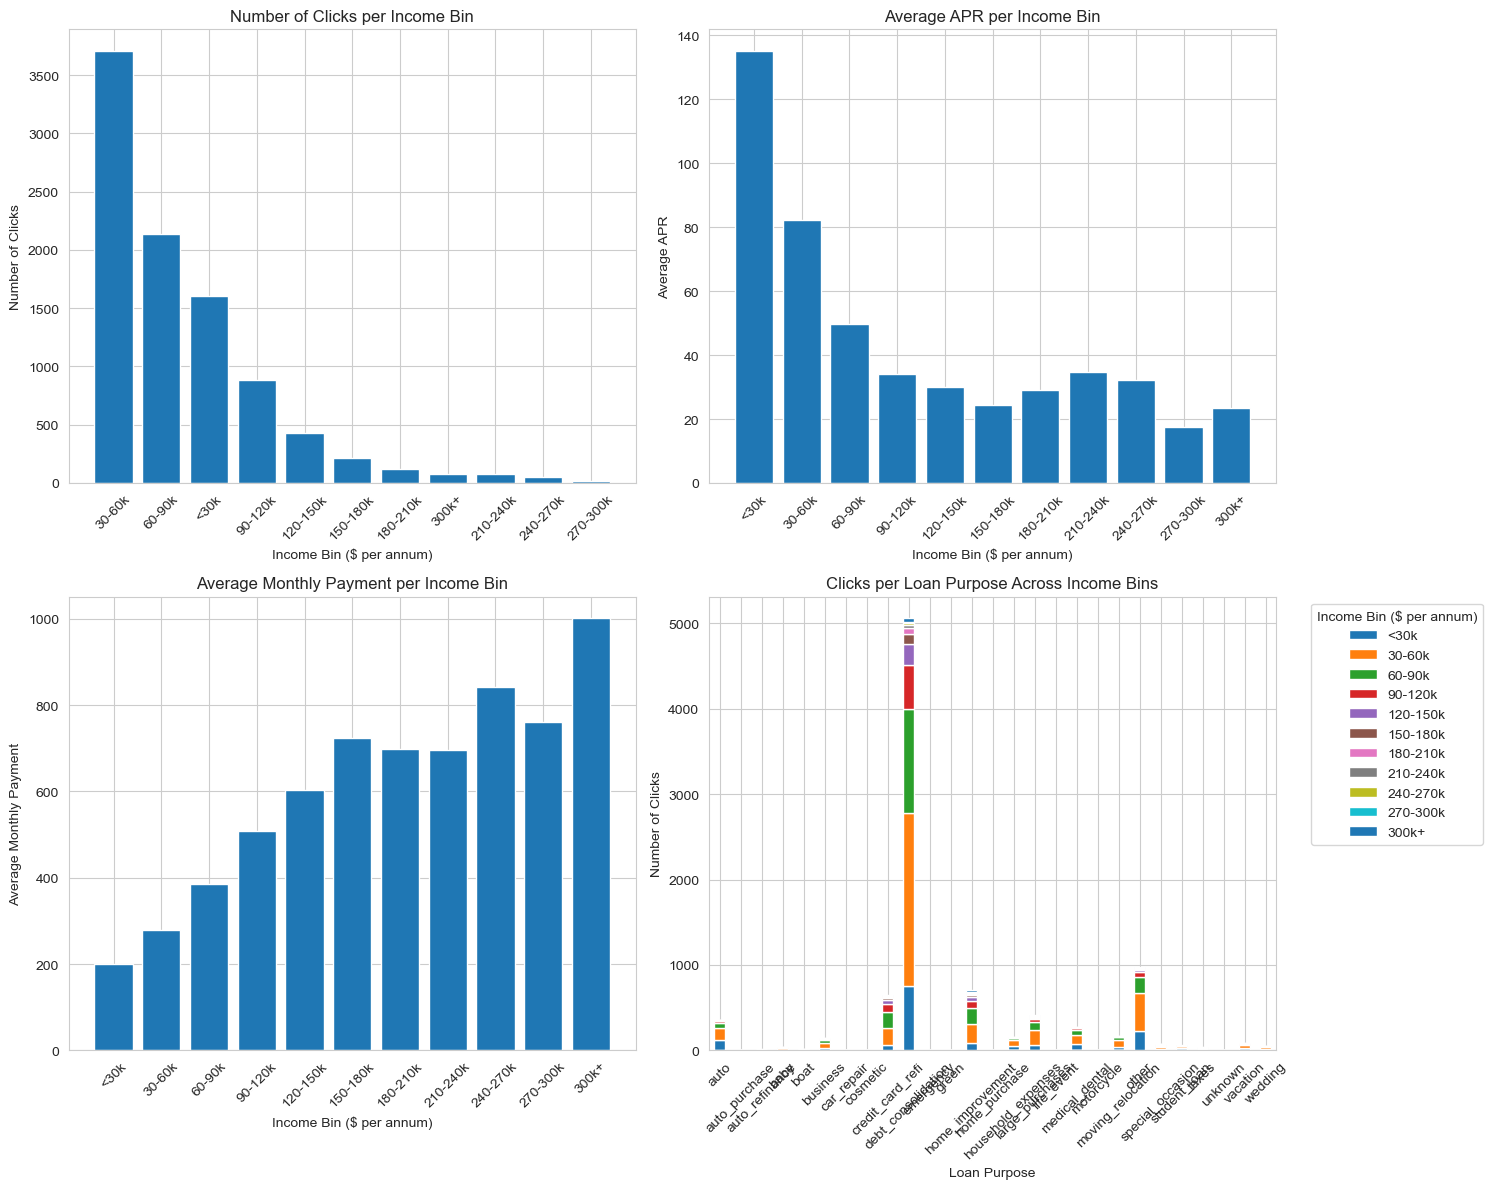

In [63]:
# Binning the annual income into categories
bins = [0, 30000, 60000, 90000, 120000, 150000, 180000, 210000, 240000, 270000, 300000, float('inf')]
labels = ['<30k', '30-60k', '60-90k', '90-120k', '120-150k', '150-180k', '180-210k', '210-240k', '240-270k', '270-300k', '300k+']
click_leads_data['income_bin'] = pd.cut(click_leads_data['annual_income'], bins=bins, labels=labels)

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# 1. Bar chart of the number of clicks per income bin
axs[0, 0].bar(click_leads_data['income_bin'].value_counts().index, click_leads_data['income_bin'].value_counts().values)
axs[0, 0].set_title('Number of Clicks per Income Bin')
axs[0, 0].set_xlabel('Income Bin ($ per annum)')
axs[0, 0].set_ylabel('Number of Clicks')
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Bar chart of the average APR per income bin
avg_apr_per_income_bin = click_leads_data.groupby('income_bin')['offer_apr'].mean().sort_index()
axs[0, 1].bar(avg_apr_per_income_bin.index, avg_apr_per_income_bin.values)
axs[0, 1].set_title('Average APR per Income Bin')
axs[0, 1].set_xlabel('Income Bin ($ per annum)')
axs[0, 1].set_ylabel('Average APR')
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar chart of the average monthly payment per income bin
avg_payment_per_income_bin = click_leads_data.groupby('income_bin')['offer_monthly_payment'].mean().sort_index()
axs[1, 0].bar(avg_payment_per_income_bin.index, avg_payment_per_income_bin.values)
axs[1, 0].set_title('Average Monthly Payment per Income Bin')
axs[1, 0].set_xlabel('Income Bin ($ per annum)')
axs[1, 0].set_ylabel('Average Monthly Payment')
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Bar chart of the number of clicks per loan purpose across different income bins
pivot = click_leads_data.pivot_table(index='loan_purpose', columns='income_bin', values='click_id', aggfunc='count').fillna(0)
pivot.plot(kind='bar', stacked=True, ax=axs[1, 1], figsize=(15, 12))
axs[1, 1].set_title('Clicks per Loan Purpose Across Income Bins')
axs[1, 1].set_xlabel('Loan Purpose')
axs[1, 1].set_ylabel('Number of Clicks')
axs[1, 1].legend(title='Income Bin ($ per annum)', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1, 1].tick_params(axis='x', rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


### Number of Clicks per Income Bin: The first chart shows how many clicks were recorded for each income range. This might help you identify which income groups are more active or engaged with the offers presented. (30-60k)

Average APR per Income Bin: The second chart indicates the average Annual Percentage Rate (APR) of the offers clicked, segmented by the income bins. This can reveal if there's a pattern in the types of offers (in terms of APR) that different income groups are engaging with.

Average Monthly Payment per Income Bin: The third chart displays the average monthly payment of the offers clicked, across different income ranges. This might provide insights into the affordability or attractiveness of offers for different income groups.

Clicks per Loan Purpose Across Income Bins: The fourth chart illustrates how clicks on offers are distributed among different loan purposes across various income bins. This can provide insights into the different financial needs or intents of various income segments.

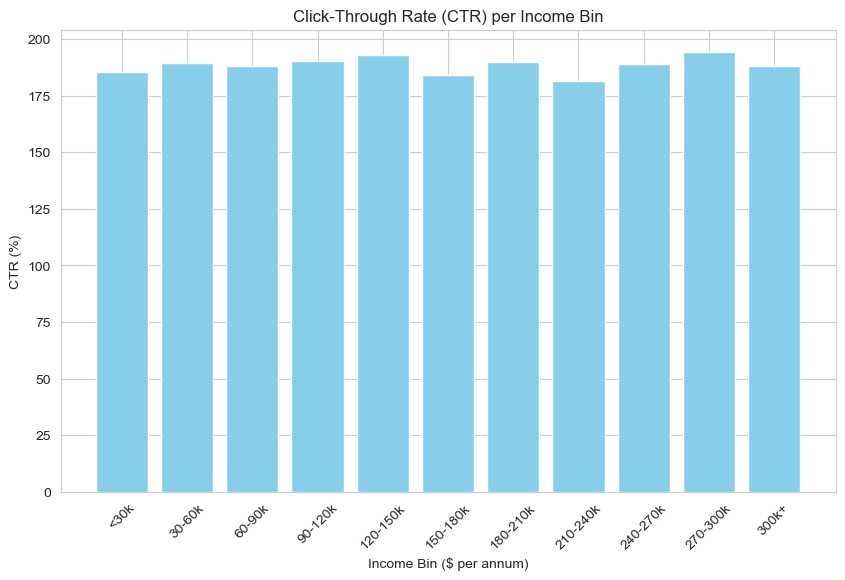

income_bin
<30k        185.651903
30-60k      189.617044
60-90k      188.295880
90-120k     190.249433
120-150k    193.023256
150-180k    184.112150
180-210k    189.830508
210-240k    181.578947
240-270k    188.888889
270-300k    194.444444
300k+       188.311688
dtype: float64

In [64]:
# Calculating the total number of clicks per income bin
total_clicks_per_bin = click_leads_data.groupby('income_bin')['num_clicks'].sum()

# Assuming that each offer in the rate_table corresponds to an impression (offer viewed),
# calculating the total number of offers viewed per income bin
total_offers_per_bin = click_leads_data.groupby('income_bin')['rate_table_offer_id'].count()

# Calculating CTR per income bin
ctr_per_bin = (total_clicks_per_bin / total_offers_per_bin) * 100

# Visualizing CTR across income bins
plt.figure(figsize=(10, 6))
plt.bar(ctr_per_bin.index, ctr_per_bin.values, color='skyblue')
plt.title('Click-Through Rate (CTR) per Income Bin')
plt.xlabel('Income Bin ($ per annum)')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.show()

# Displaying the CTR values
ctr_per_bin


The CTR is quite high across all income bins, which might indicate a strong engagement with the offers presented.
There doesn’t appear to be a strong variance in CTR across different income bins, indicating that engagement is relatively uniform across different income levels.

#### Further Analysis:
Data Quality Check: Investigate why CTR is above 100% - is it due to data issues, or the way we've estimated views?
Offer Details: Explore if certain offer attributes (APR, fees, etc.) correspond to higher CTRs within certain income bins.
Demographic Details: Further explore how other demographic details (state, employment status, etc.) interact with income to influence CTR.

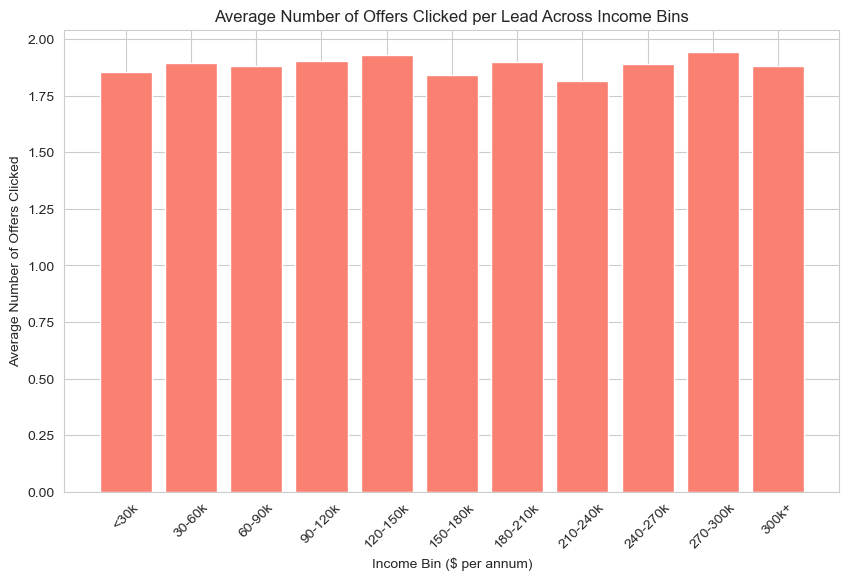

income_bin
<30k        1.856519
30-60k      1.896170
60-90k      1.882959
90-120k     1.902494
120-150k    1.930233
150-180k    1.841121
180-210k    1.898305
210-240k    1.815789
240-270k    1.888889
270-300k    1.944444
300k+       1.883117
Name: num_clicks, dtype: float64

In [66]:
# Calculating the average number of offers clicked per lead within each income bin
avg_clicks_per_lead_per_bin = click_leads_data.groupby('income_bin')['num_clicks'].mean()

# Visualizing the average number of offers clicked per lead across income bins
plt.figure(figsize=(10, 6))
plt.bar(avg_clicks_per_lead_per_bin.index, avg_clicks_per_lead_per_bin.values, color='salmon')
plt.title('Average Number of Offers Clicked per Lead Across Income Bins')
plt.xlabel('Income Bin ($ per annum)')
plt.ylabel('Average Number of Offers Clicked')
plt.xticks(rotation=45)
plt.show()

# Displaying the values
avg_clicks_per_lead_per_bin


The average number of offers clicked per lead is relatively consistent across different income bins, with slight variations.

The 120-150k and 270-300k income bins have slightly higher average clicks per lead, which might indicate a bit more engagement or interest in the offers presented.

### POC on building a predictive model to predict offer clicks.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Preparing the Data
# Creating a binary target variable: 1 if the offer was clicked (num_clicks > 0), else 0
click_leads_data['is_clicked'] = click_leads_data['num_clicks'].apply(lambda x: 1 if x > 0 else 0)

# Selecting relevant features
features = ['state', 'loan_purpose', 'credit', 'is_employed', 'offer_apr', 'offer_monthly_payment']
target = 'is_clicked'

# Handling Categorical Variables: Encoding
encoder = LabelEncoder()
encoded_data = click_leads_data[features + [target]].copy()
encoded_data['state'] = encoder.fit_transform(encoded_data['state'].astype(str))
encoded_data['loan_purpose'] = encoder.fit_transform(encoded_data['loan_purpose'].astype(str))
encoded_data['credit'] = encoder.fit_transform(encoded_data['credit'].astype(str))
encoded_data['is_employed'] = encoder.fit_transform(encoded_data['is_employed'].astype(str))

# Handling Missing Values: Simple Imputer (Median for simplicity)
encoded_data.fillna(encoded_data.median(), inplace=True)

# Splitting Data into Train and Test Sets
X = encoded_data[features]
y = encoded_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building: Random Forest Classifier as a starting point
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

# Evaluations
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)
classification_rep = classification_report(y_test, test_preds)

(train_accuracy, test_accuracy, classification_rep)


(1.0,
 1.0,
 '              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00      2796\n\n    accuracy                           1.00      2796\n   macro avg       1.00      1.00      1.00      2796\nweighted avg       1.00      1.00      1.00      2796\n')

### The same as XGBT, all instances in our dataset belong to the same class, so any model will achieve perfect accuracy by always predicting the majority class. If we have addtional data available, 

Data Review: Understand why only clicked instances are available and explore if additional data with non-click instances can be obtained.

Feature Importance: This might be moot given that all instances belong to the same class, but if additional data is obtained, this step would be valuable.

Model Simplification: Again, without instances of non-clicks, building a predictive model is not feasible with the current data. But this step will be relevant if additional data becomes available.

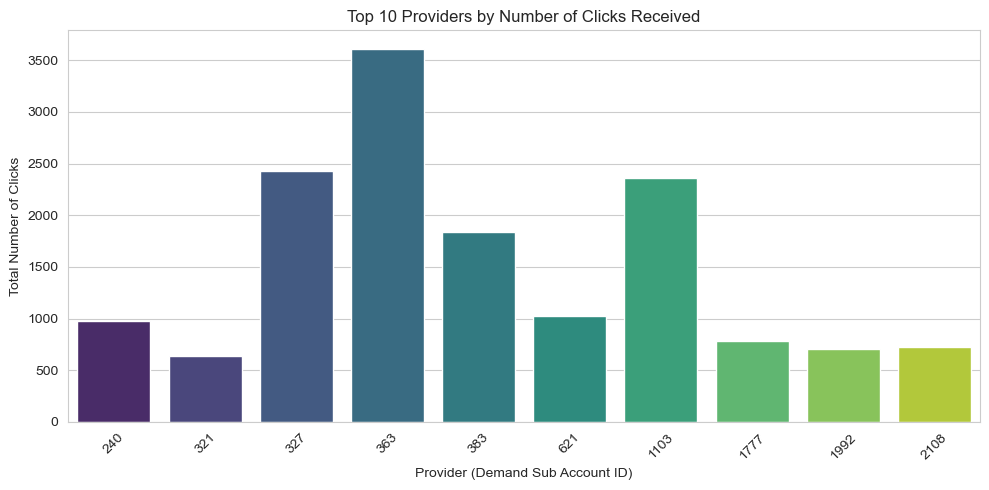

,demand_sub_account_id,num_clicks
6,363,3608.0
5,327,2432.0
15,1103,2362.0
7,383,1834.0
12,621,1029.0
1,240,974.0
18,1777,784.0
23,2108,726.0
20,1992,705.0
4,321,641.0


In [70]:
# Loading the rate_tables data
# rate_tables = pd.read_csv('/mnt/data/rate_tables.csv')

# Merging click_leads_data with rate_tables to get the 'demand_sub_account_id'
merged_data = pd.merge(click_leads_data, rate_tables[['rate_table_offer_id', 'demand_sub_account_id']], 
                       how='left', on='rate_table_offer_id')

# Calculating the total number of clicks per provider
provider_clicks = merged_data.groupby('demand_sub_account_id')['num_clicks'].sum().reset_index().sort_values(by='num_clicks', ascending=False)

# Visualizing the top 10 providers in terms of clicks received
plt.figure(figsize=(10, 5))
sns.barplot(x='demand_sub_account_id', y='num_clicks', data=provider_clicks.head(10), palette='viridis')
plt.title('Top 10 Providers by Number of Clicks Received')
plt.xlabel('Provider (Demand Sub Account ID)')
plt.ylabel('Total Number of Clicks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the top 10 providers
provider_clicks.head(10)


The provider with demand_sub_account_id 363 received the highest number of clicks (3608), followed by those with IDs 327 and 1103.
There seems to be a significant variance in the number of clicks received by different providers, which may suggest varying degrees of offer attractiveness, user relevance, or other factors influencing user engagement.

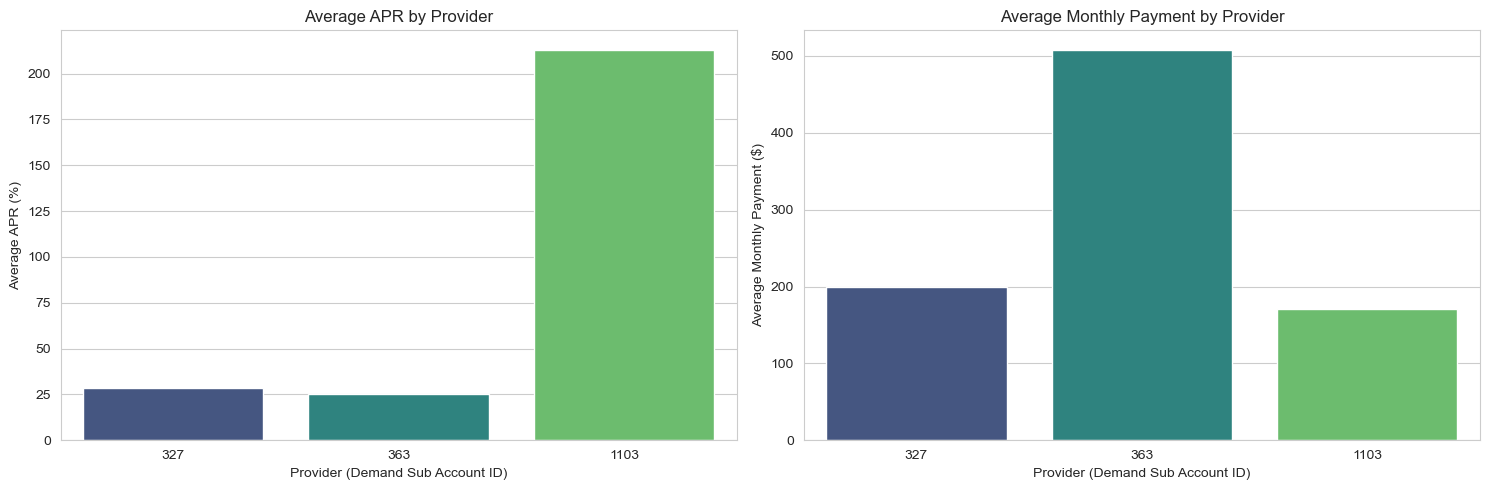

,demand_sub_account_id,offer_apr,offer_monthly_payment
0,327,28.391159,198.931290
1,363,25.534279,507.758986
2,1103,212.936487,170.147878


In [71]:
# Identifying the top 3 providers
top_providers = [363, 327, 1103]

# Filtering data for offers from the top 3 providers
top_providers_data = merged_data[merged_data['demand_sub_account_id'].isin(top_providers)]

# Calculating average APR and Monthly Payment per provider
provider_offer_attributes = top_providers_data.groupby('demand_sub_account_id')[['offer_apr', 'offer_monthly_payment']].mean().reset_index()

# Visualizing the average APR and Monthly Payment for top 3 providers
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='demand_sub_account_id', y='offer_apr', data=provider_offer_attributes, ax=axs[0], palette='viridis')
axs[0].set_title('Average APR by Provider')
axs[0].set_xlabel('Provider (Demand Sub Account ID)')
axs[0].set_ylabel('Average APR (%)')

sns.barplot(x='demand_sub_account_id', y='offer_monthly_payment', data=provider_offer_attributes, ax=axs[1], palette='viridis')
axs[1].set_title('Average Monthly Payment by Provider')
axs[1].set_xlabel('Provider (Demand Sub Account ID)')
axs[1].set_ylabel('Average Monthly Payment ($)')

plt.tight_layout()
plt.show()

# Displaying the calculated values
provider_offer_attributes


### Observations:
APR:
Provider 1103 has a notably high average APR (212.94%), which is quite distinct from the other two top providers.
Providers 327 and 363 have relatively similar and lower average APRs (28.39% and 25.53%, respectively).

Monthly Payment:
Provider 363 offers a higher average monthly payment amount ($507.76) compared to the other two.

Providers 327 and 1103 have lower and comparable average monthly payments ($198.93 and $170.15, respectively).

### Interpretation:
Provider 1103: Despite having a significantly higher average APR, it's one of the top-engaged providers, which is intriguing and warrants further exploration into what might be driving clicks despite the high costs associated.

Provider 363: Offers a higher average monthly payment, suggesting that users engaging with this provider might be interested in offers with higher loan amounts or longer terms.

Provider 327: Has the lowest average APR and monthly payment among the top providers, suggesting a different user base or offer attractiveness.

In [79]:
merged_leads_rate_tables = pd.merge(leads, rate_tables, how='inner', on='lead_uuid')
merged_data = pd.merge(merged_leads_rate_tables, clicks, how='inner', on='rate_table_offer_id')
print(merged_data.columns)

Index(['lead_uuid', 'requested', 'state', 'loan_purpose', 'credit',
       'annual_income', 'is_employed', 'monthly_net_income',
       'mortgage_property_type', 'has_mortgage', 'zipcode', 'lead_created_at',
       '__index_level_0___x', 'rate_table_id', 'rate_table_offer_id',
       'rate_table_offer_created_at', 'offer_apr', 'offer_fee_fixed',
       'offer_fee_rate', 'offer_monthly_payment', 'offer_rec_score',
       'offer_rank_on_table', 'demand_sub_account_id', '__index_level_0___y',
       'num_clicks', 'last_click', 'first_click', 'click_id'],
      dtype='object')


In [80]:
# Group by provider and sum up the number of clicks
provider_clicks = merged_data.groupby('demand_sub_account_id')['num_clicks'].sum().reset_index()

# Identify top 3 providers based on total number of clicks
top_providers = provider_clicks.nlargest(3, 'num_clicks')['demand_sub_account_id'].tolist()


In [81]:
# Filter merged_data to retain only data related to top providers
top_providers_data = merged_data[merged_data['demand_sub_account_id'].isin(top_providers)]


In [82]:
# Verify unique providers in top_providers_data
print(top_providers_data['demand_sub_account_id'].unique())

# Verify columns in top_providers_data
print(top_providers_data.columns)


[ 363  327 1103]
Index(['lead_uuid', 'requested', 'state', 'loan_purpose', 'credit',
       'annual_income', 'is_employed', 'monthly_net_income',
       'mortgage_property_type', 'has_mortgage', 'zipcode', 'lead_created_at',
       '__index_level_0___x', 'rate_table_id', 'rate_table_offer_id',
       'rate_table_offer_created_at', 'offer_apr', 'offer_fee_fixed',
       'offer_fee_rate', 'offer_monthly_payment', 'offer_rec_score',
       'offer_rank_on_table', 'demand_sub_account_id', '__index_level_0___y',
       'num_clicks', 'last_click', 'first_click', 'click_id'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


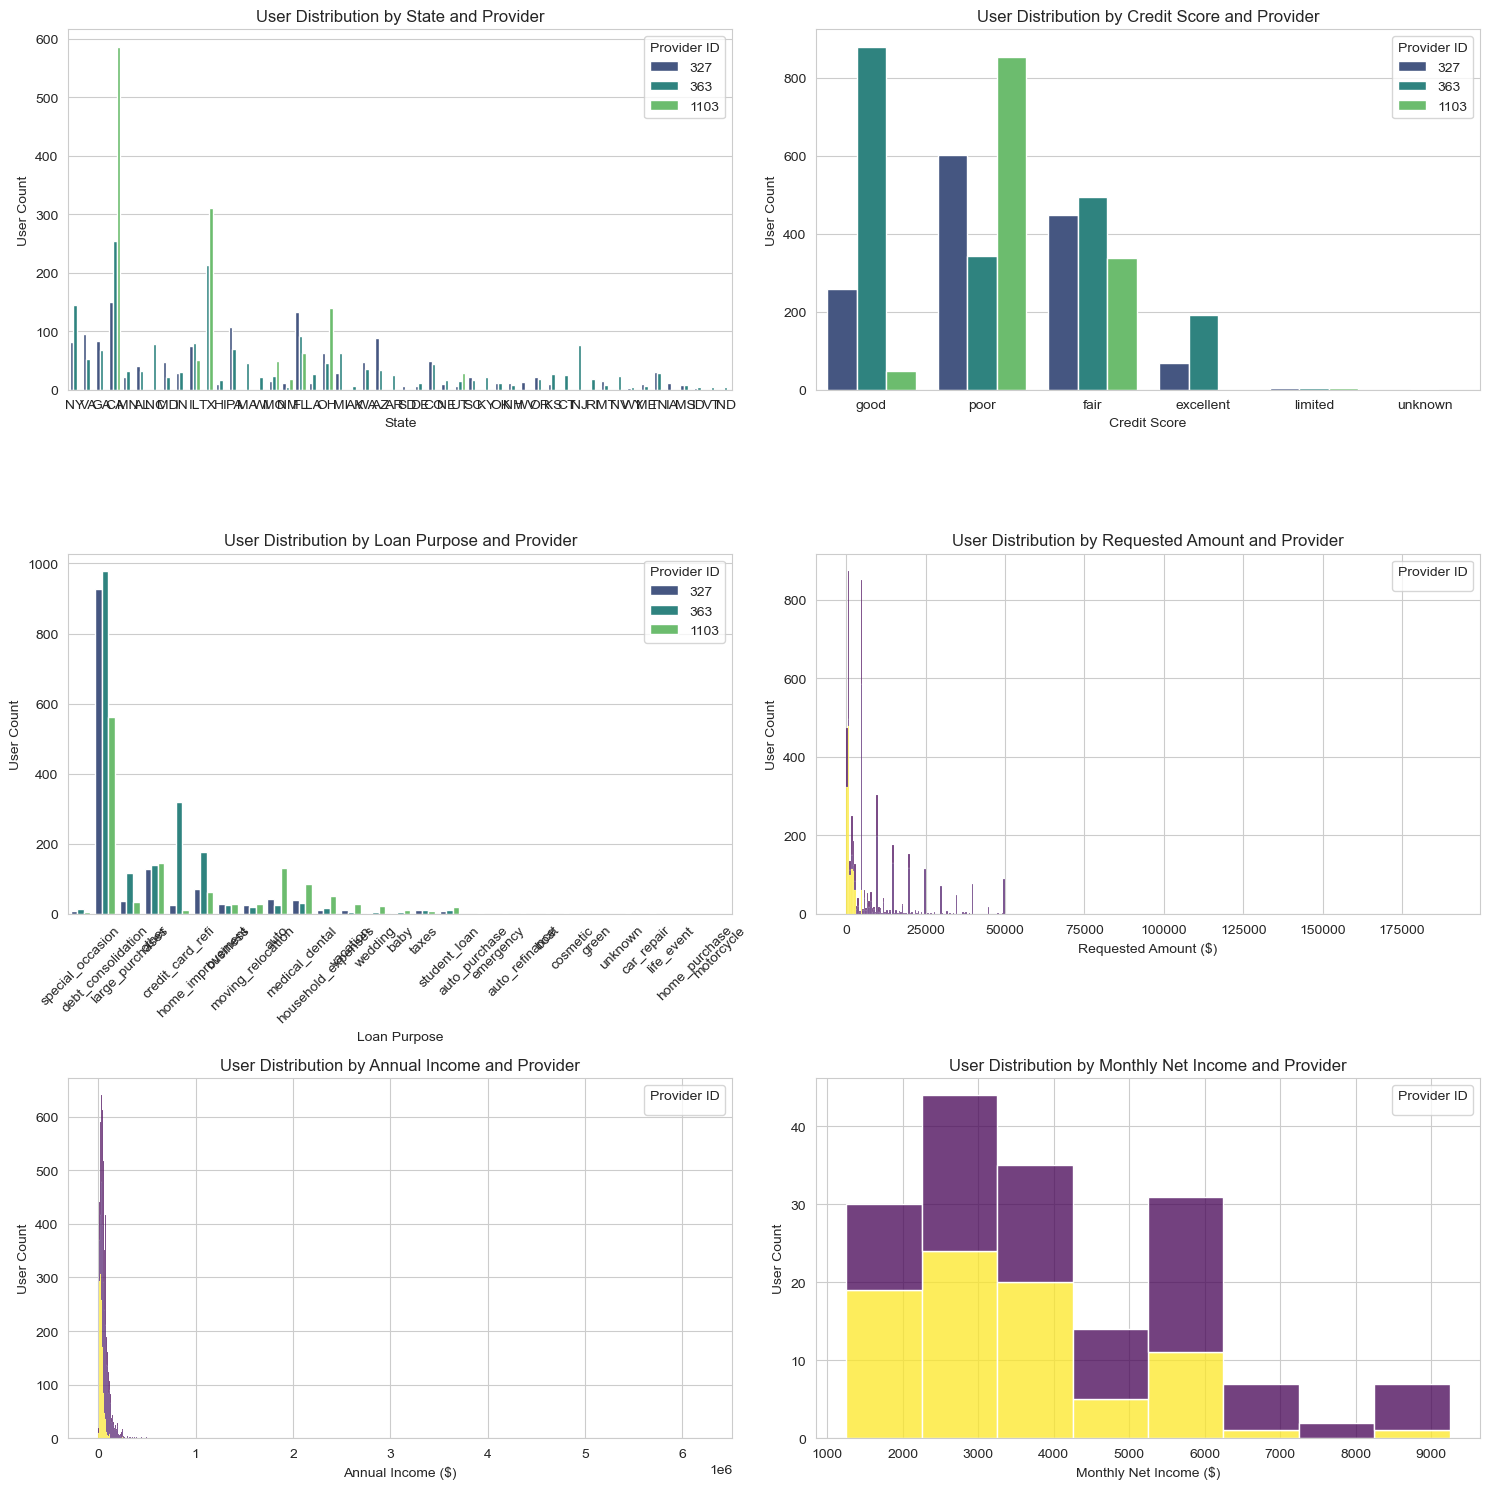

In [83]:
### okay, focus on top 3 providers
# Creating subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# 1. Demographics: Visualizing state and credit score distributions per provider
sns.countplot(x='state', hue='demand_sub_account_id', data=top_providers_data, ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('User Distribution by State and Provider')
axs[0, 0].set_xlabel('State')
axs[0, 0].set_ylabel('User Count')
axs[0, 0].legend(title='Provider ID', loc='upper right')

sns.countplot(x='credit', hue='demand_sub_account_id', data=top_providers_data, ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('User Distribution by Credit Score and Provider')
axs[0, 1].set_xlabel('Credit Score')
axs[0, 1].set_ylabel('User Count')
axs[0, 1].legend(title='Provider ID', loc='upper right')

# 2. Loan Characteristics: Visualizing loan purpose and requested amount distributions per provider
sns.countplot(x='loan_purpose', hue='demand_sub_account_id', data=top_providers_data, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('User Distribution by Loan Purpose and Provider')
axs[1, 0].set_xlabel('Loan Purpose')
axs[1, 0].set_ylabel('User Count')
axs[1, 0].legend(title='Provider ID', loc='upper right')
axs[1, 0].tick_params(axis='x', rotation=45)

sns.histplot(data=top_providers_data, x='requested', hue='demand_sub_account_id', multiple="stack", binwidth=500, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('User Distribution by Requested Amount and Provider')
axs[1, 1].set_xlabel('Requested Amount ($)')
axs[1, 1].set_ylabel('User Count')
axs[1, 1].legend(title='Provider ID', loc='upper right')

# 3. Income: Visualizing income distribution per provider
sns.histplot(data=top_providers_data, x='annual_income', hue='demand_sub_account_id', multiple="stack", binwidth=10000, ax=axs[2, 0], palette='viridis')
axs[2, 0].set_title('User Distribution by Annual Income and Provider')
axs[2, 0].set_xlabel('Annual Income ($)')
axs[2, 0].set_ylabel('User Count')
axs[2, 0].legend(title='Provider ID', loc='upper right')

sns.histplot(data=top_providers_data, x='monthly_net_income', hue='demand_sub_account_id', multiple="stack", binwidth=1000, ax=axs[2, 1], palette='viridis')
axs[2, 1].set_title('User Distribution by Monthly Net Income and Provider')
axs[2, 1].set_xlabel('Monthly Net Income ($)')
axs[2, 1].set_ylabel('User Count')
axs[2, 1].legend(title='Provider ID', loc='upper right')

plt.tight_layout()
plt.show()


### User Segmentation Insights:
1. Demographics:

State: Users from various states engage with the top providers, and the distribution of users across states appears to be somewhat consistent across the providers.
Credit Score: Users with various credit scores engage with the top providers, and the distribution seems fairly consistent across the providers.

2. Loan Characteristics:

Loan Purpose: The distribution of users across different loan purposes is relatively consistent for the top providers, with “debt_consolidation” being notably popular.
Requested Amount: Users requesting various loan amounts engage with the top providers, without a clear pattern indicating a preference for a specific requested amount range.

3. Income:

Annual and Monthly Income: The distributions of annual and monthly income for users who engage with the top providers appear to be wide-ranging, with no clear pattern indicating a particular income segment preference.

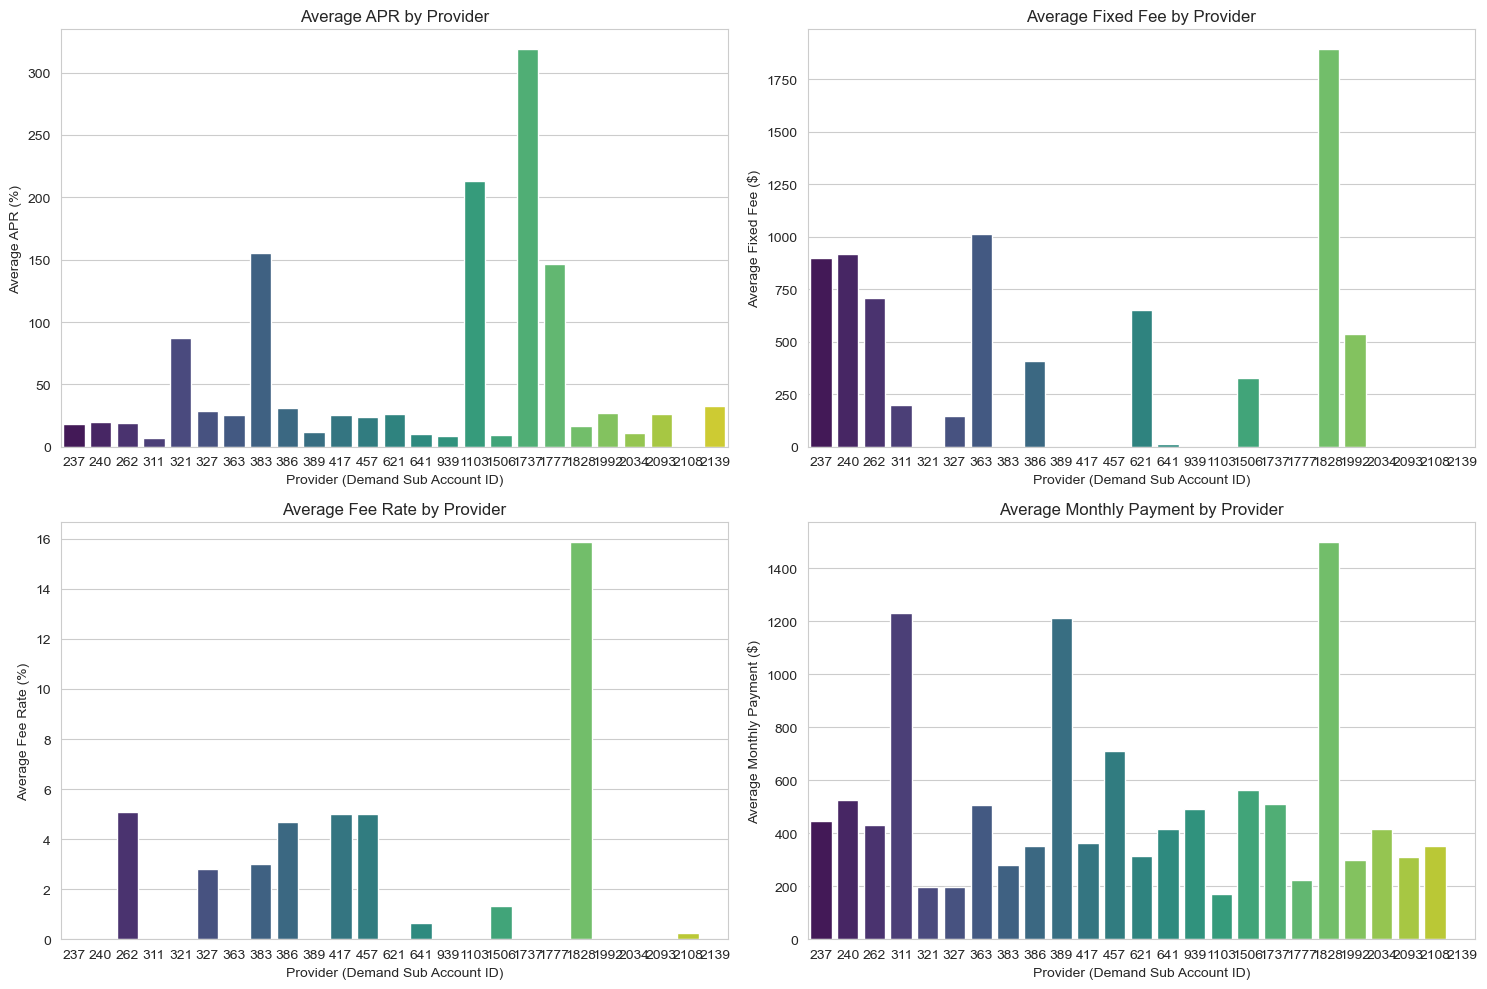

In [84]:
# Calculating average offer attributes per provider
avg_offer_attributes = merged_data.groupby('demand_sub_account_id')[['offer_apr', 'offer_fee_fixed', 'offer_fee_rate', 'offer_monthly_payment']].mean().reset_index()

# Visualizing the average offer attributes for different providers
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='demand_sub_account_id', y='offer_apr', data=avg_offer_attributes, ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Average APR by Provider')
axs[0, 0].set_xlabel('Provider (Demand Sub Account ID)')
axs[0, 0].set_ylabel('Average APR (%)')

sns.barplot(x='demand_sub_account_id', y='offer_fee_fixed', data=avg_offer_attributes, ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Average Fixed Fee by Provider')
axs[0, 1].set_xlabel('Provider (Demand Sub Account ID)')
axs[0, 1].set_ylabel('Average Fixed Fee ($)')

sns.barplot(x='demand_sub_account_id', y='offer_fee_rate', data=avg_offer_attributes, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Average Fee Rate by Provider')
axs[1, 0].set_xlabel('Provider (Demand Sub Account ID)')
axs[1, 0].set_ylabel('Average Fee Rate (%)')

sns.barplot(x='demand_sub_account_id', y='offer_monthly_payment', data=avg_offer_attributes, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Average Monthly Payment by Provider')
axs[1, 1].set_xlabel('Provider (Demand Sub Account ID)')
axs[1, 1].set_ylabel('Average Monthly Payment ($)')

plt.tight_layout()
plt.show()


### Above shows the average values of different offer attributes (offer_apr, offer_fee_fixed, offer_fee_rate, offer_monthly_payment) across different providers.

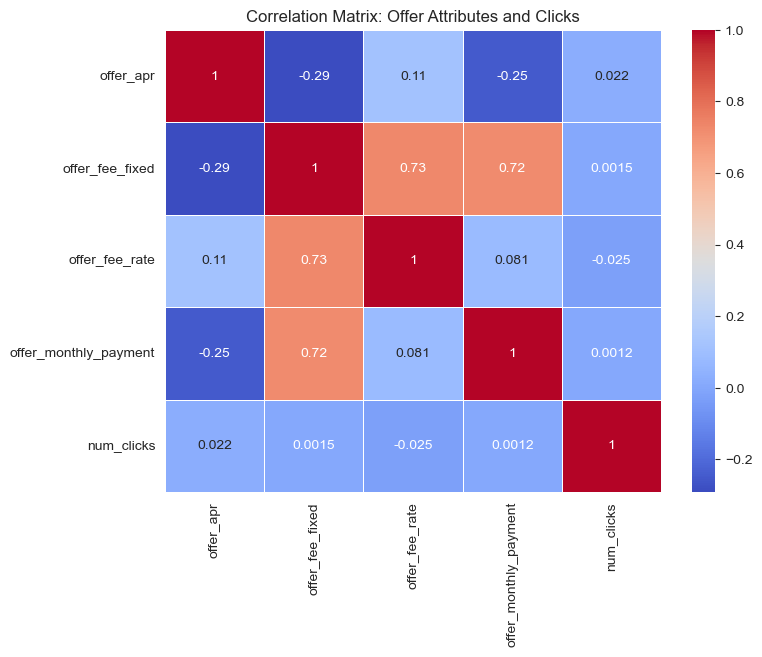

In [85]:
# Calculating correlation between offer attributes and num_clicks
correlation_matrix = merged_data[['offer_apr', 'offer_fee_fixed', 'offer_fee_rate', 'offer_monthly_payment', 'num_clicks']].corr()

# Visualizing correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Offer Attributes and Clicks')
plt.show()


#### Lets try 1. Predicting Clicks: (possible classification issue)
Objective: Predict whether a user will click on an offer based on various attributes (e.g., user demographics, offer details).
Target Variable: A binary variable indicating whether an offer was clicked (1) or not (0).
Features: User attributes (annual_income, state, loan_purpose, etc.) and offer attributes (offer_apr, offer_monthly_payment, etc.).

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Sample Data Preparation (Ensure to adjust according to your actual dataframe)
merged_data['is_clicked'] = merged_data['num_clicks'].apply(lambda x: 1 if x > 0 else 0)

# Defining features and target
features = ['annual_income', 'state', 'loan_purpose', 'offer_apr', 'offer_monthly_payment']
target = 'is_clicked'

X = merged_data[features]
y = merged_data[target]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Defining numerical and categorical features
num_features = ['annual_income', 'offer_apr', 'offer_monthly_payment']
cat_features = ['state', 'loan_purpose']

# Creating transformers
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])


In [90]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report, accuracy_score

# # Creating a model pipeline
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(random_state=42))])

# # Training the model
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Model Evaluation
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [88]:
print(merged_data['is_clicked'].value_counts())


1    9320
Name: is_clicked, dtype: int64


In [89]:
print(clicks['num_clicks'].value_counts())

2     6790
1     1904
3      487
4      100
5       24
6        7
7        4
15       1
8        1
14       1
11       1
Name: num_clicks, dtype: int64


### As you see above, only one class on is_clicks

Let's try . Predicting Offer Attractiveness:
Objective: Predict the attractiveness of an offer based on its attributes and potentially user demographics.
Target Variable: A binary variable indicating whether an offer is attractive (1) or not (0), which could be defined based on click-through rates or other criteria.
Features: Offer attributes and potentially aggregated user attributes interacting with the offer.

In [96]:
### handling the missing values
# Load the data
leads = pd.read_csv('leads.csv')
rate_tables = pd.read_csv('rate_tables.csv')

# Check missing values for 'leads'
missing_leads_before = leads.isnull().mean()
print("Before imputation in leads:")
print(missing_leads_before[missing_leads_before > 0])

# Mean imputation for numerical variables with less than 1% missing in 'leads'
leads['requested'].fillna(leads['requested'].mean(), inplace=True)
leads['annual_income'].fillna(leads['annual_income'].mean(), inplace=True)

# Mode imputation for categorical variables with less than 1% missing in 'leads'
leads['state'].fillna(leads['state'].mode()[0], inplace=True)
leads['loan_purpose'].fillna(leads['loan_purpose'].mode()[0], inplace=True)
leads['credit'].fillna(leads['credit'].mode()[0], inplace=True)
leads['is_employed'].fillna(leads['is_employed'].mode()[0], inplace=True)
leads['zipcode'].fillna(leads['zipcode'].mode()[0], inplace=True)

# Check missing values for 'rate_tables'
missing_rate_tables_before = rate_tables.isnull().mean()
print("\nBefore imputation in rate_tables:")
print(missing_rate_tables_before[missing_rate_tables_before > 0])

# Mean imputation for numerical variables in 'rate_tables'
rate_tables['offer_apr'].fillna(rate_tables['offer_apr'].mean(), inplace=True)
rate_tables['offer_monthly_payment'].fillna(rate_tables['offer_monthly_payment'].mean(), inplace=True)
rate_tables['offer_rec_score'].fillna(rate_tables['offer_rec_score'].mean(), inplace=True)

# Check missing values after imputation
missing_leads_after = leads.isnull().mean()
print("\nAfter imputation in leads:")
print(missing_leads_after[missing_leads_after > 0])

missing_rate_tables_after = rate_tables.isnull().mean()
print("\nAfter imputation in rate_tables:")
print(missing_rate_tables_after[missing_rate_tables_after > 0])

/var/folders/41/jxsw4zk17x5fvrkwlt3f5v_r0000gn/T/ipykernel_4614/2426863965.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  leads = pd.read_csv('leads.csv')


Before imputation in leads:
requested                 0.00053
state                     0.00041
loan_purpose              0.00027
credit                    0.00062
annual_income             0.00062
is_employed               0.00665
monthly_net_income        0.75709
mortgage_property_type    0.99845
has_mortgage              1.00000
zipcode                   0.00009
dtype: float64

Before imputation in rate_tables:
offer_apr                0.000037
offer_fee_fixed          0.397101
offer_fee_rate           0.830311
offer_monthly_payment    0.002602
offer_rec_score          0.003711
dtype: float64

After imputation in leads:
monthly_net_income        0.75709
mortgage_property_type    0.99845
has_mortgage              1.00000
dtype: float64

After imputation in rate_tables:
offer_fee_fixed    0.397101
offer_fee_rate     0.830311
dtype: float64


In [97]:
# Placeholder for high missingness columns
leads['monthly_net_income'].fillna(-9999, inplace=True)
leads['mortgage_property_type'].fillna("Unknown", inplace=True)

# For rate_tables, placeholder might be a viable option given the substantial missingness
rate_tables['offer_fee_fixed'].fillna(-9999, inplace=True)
rate_tables['offer_fee_rate'].fillna(-9999, inplace=True)

In [124]:
clicks = pd.read_csv('clicks.csv')
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9320 entries, 0 to 9319
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rate_table_offer_id  9320 non-null   int64 
 1   num_clicks           9320 non-null   int64 
 2   last_click           9320 non-null   object
 3   first_click          9320 non-null   object
dtypes: int64(2), object(2)
memory usage: 291.4+ KB


In [125]:
clicks['last_click'] = pd.to_datetime(clicks['last_click'])
clicks['first_click'] = pd.to_datetime(clicks['first_click'])

In [126]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9320 entries, 0 to 9319
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rate_table_offer_id  9320 non-null   int64         
 1   num_clicks           9320 non-null   int64         
 2   last_click           9320 non-null   datetime64[ns]
 3   first_click          9320 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 291.4 KB


In [127]:
leads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   lead_uuid               100000 non-null  object        
 1   requested               100000 non-null  float64       
 2   state                   100000 non-null  category      
 3   loan_purpose            100000 non-null  object        
 4   credit                  100000 non-null  object        
 5   annual_income           100000 non-null  float64       
 6   is_employed             100000 non-null  object        
 7   monthly_net_income      100000 non-null  float64       
 8   mortgage_property_type  100000 non-null  object        
 9   zipcode                 100000 non-null  object        
 10  lead_created_at         100000 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(3), object(6)
memory usage: 7.7+ MB


In [107]:
# Dropping the 'has_mortgage' column
# leads = leads.drop(columns=['has_mortgage'])


# Re-checking the DataFrame info to ensure the column is dropped
leads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lead_uuid               100000 non-null  object 
 1   requested               100000 non-null  float64
 2   state                   100000 non-null  object 
 3   loan_purpose            100000 non-null  object 
 4   credit                  100000 non-null  object 
 5   annual_income           100000 non-null  float64
 6   is_employed             100000 non-null  object 
 7   monthly_net_income      100000 non-null  float64
 8   mortgage_property_type  100000 non-null  object 
 9   zipcode                 100000 non-null  object 
 10  lead_created_at         100000 non-null  object 
 11  __index_level_0__       100000 non-null  int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 9.2+ MB


In [108]:
leads['lead_created_at'] = pd.to_datetime(leads['lead_created_at'])
leads['state'] = leads['state'].astype('category')
leads = leads.drop(columns=['__index_level_0__'])
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   lead_uuid               100000 non-null  object        
 1   requested               100000 non-null  float64       
 2   state                   100000 non-null  category      
 3   loan_purpose            100000 non-null  object        
 4   credit                  100000 non-null  object        
 5   annual_income           100000 non-null  float64       
 6   is_employed             100000 non-null  object        
 7   monthly_net_income      100000 non-null  float64       
 8   mortgage_property_type  100000 non-null  object        
 9   zipcode                 100000 non-null  object        
 10  lead_created_at         100000 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(3), object(6)
memory usage: 7.7+ MB


In [109]:
print(leads['is_employed'].value_counts())

employed              88701
other                  8461
self_employed          1198
retired                 932
employed_full_time      345
not_employed            208
military                142
employed_part_time       12
unknown                   1
Name: is_employed, dtype: int64


In [138]:
# rate_tables = rate_tables.drop(columns=['__index_level_0__'])
rate_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458939 entries, 0 to 458938
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   lead_uuid                    458939 non-null  object        
 1   rate_table_id                458939 non-null  int64         
 2   rate_table_offer_id          458939 non-null  int64         
 3   rate_table_offer_created_at  458939 non-null  datetime64[ns]
 4   offer_apr                    458939 non-null  float64       
 5   offer_fee_fixed              458939 non-null  float64       
 6   offer_fee_rate               458939 non-null  float64       
 7   offer_monthly_payment        458939 non-null  float64       
 8   offer_rec_score              458939 non-null  float64       
 9   offer_rank_on_table          458939 non-null  int64         
 10  demand_sub_account_id        458939 non-null  int64         
dtypes: datetime64[ns](1), floa

In [116]:
# Assuming rate_tables is your DataFrame
rate_tables['rate_table_offer_created_at'] = pd.to_datetime(rate_tables['rate_table_offer_created_at'])

In [139]:
# Merge DataFrames
merged_data_1 = pd.merge(leads, rate_tables, on='lead_uuid', how='left')
merged_data = pd.merge(merged_data_1, clicks, on='rate_table_offer_id', how='left')

# Add a binary column indicating whether an offer was clicked
merged_data['is_clicked'] = merged_data['num_clicks'].apply(lambda x: 1 if x > 0 else 0)

# Calculate Clicks and Impressions
# Note: Here, we're making a simplistic assumption that each lead viewed all offers
# You might adjust this based on your specific use-case or domain knowledge
num_clicks = merged_data['is_clicked'].sum()
impressions = len(merged_data)

# Calculate CTR
CTR = (num_clicks / impressions) * 100

# Display basic merged data info and CTR
print(merged_data.info())
print("CTR: ", CTR, "%")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458939 entries, 0 to 458938
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   lead_uuid                    458939 non-null  object        
 1   requested                    458939 non-null  float64       
 2   state                        458939 non-null  category      
 3   loan_purpose                 458939 non-null  object        
 4   credit                       458939 non-null  object        
 5   annual_income                458939 non-null  float64       
 6   is_employed                  458939 non-null  object        
 7   monthly_net_income           458939 non-null  float64       
 8   mortgage_property_type       458939 non-null  object        
 9   zipcode                      458939 non-null  object        
 10  lead_created_at              458939 non-null  datetime64[ns]
 11  rate_table_id             

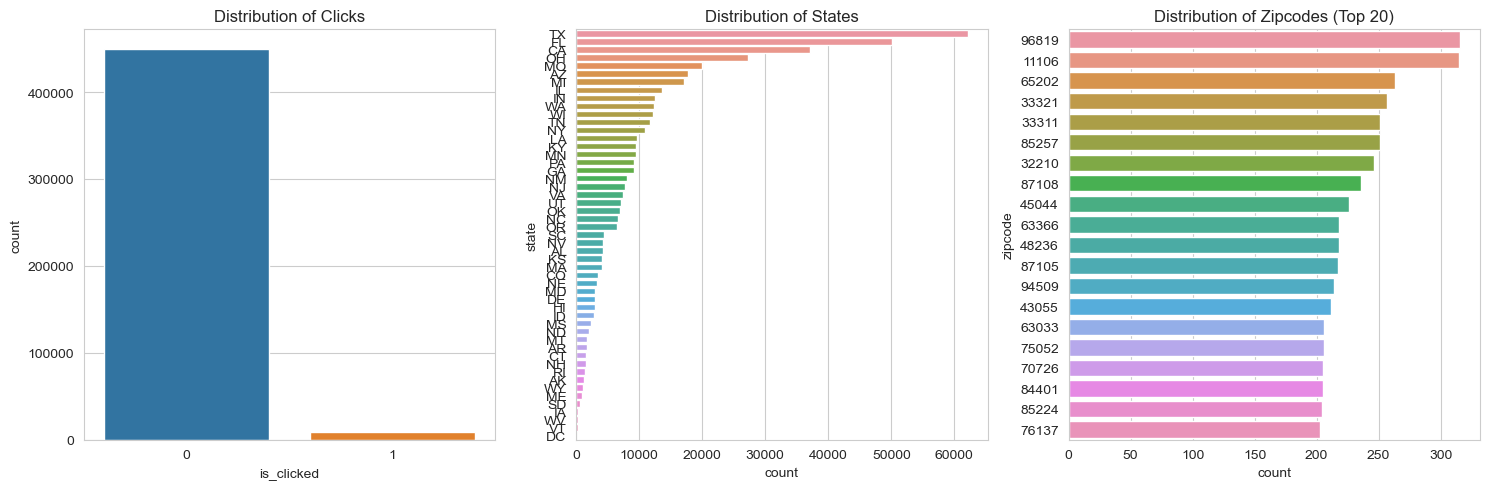

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading
# leads = pd.read_csv('/mnt/data/leads.csv').drop(columns=['has_mortgage', '__index_level_0__'])
# rate_tables = pd.read_csv('/mnt/data/rate_tables.csv').drop(columns=['__index_level_0__'])
# clicks = pd.read_csv('/mnt/data/clicks.csv')
merged_data_1 = pd.merge(leads, rate_tables, on='lead_uuid', how='left')
merged_data = pd.merge(merged_data_1, clicks, on='rate_table_offer_id', how='left')
merged_data['is_clicked'] = merged_data['num_clicks'].apply(lambda x: 1 if x > 0 else 0)

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# 1.1 Distribution of Clicks
plt.subplot(1, 3, 1)
sns.countplot(x='is_clicked', data=merged_data)
plt.title('Distribution of Clicks')

# 1.2 Distribution of States
plt.subplot(1, 3, 2)
sns.countplot(y='state', data=merged_data, order = merged_data['state'].value_counts().index)
plt.title('Distribution of States')

# 1.3 Distribution of Zipcodes (Top 20)
plt.subplot(1, 3, 3)
sns.countplot(y='zipcode', data=merged_data, order = merged_data['zipcode'].value_counts().iloc[:20].index)
plt.title('Distribution of Zipcodes (Top 20)')

plt.tight_layout()
plt.show()


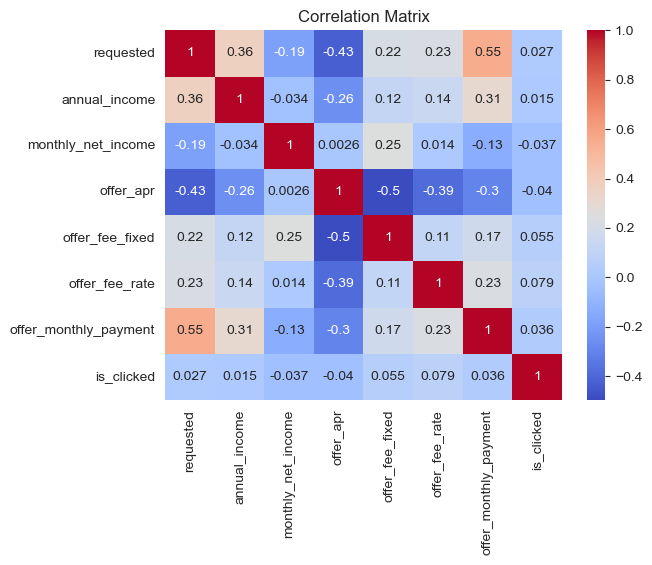

In [141]:
correlation_matrix = merged_data[['requested', 'annual_income', 'monthly_net_income', 'offer_apr', 'offer_fee_fixed', 'offer_fee_rate', 'offer_monthly_payment', 'is_clicked']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/Users/mli/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


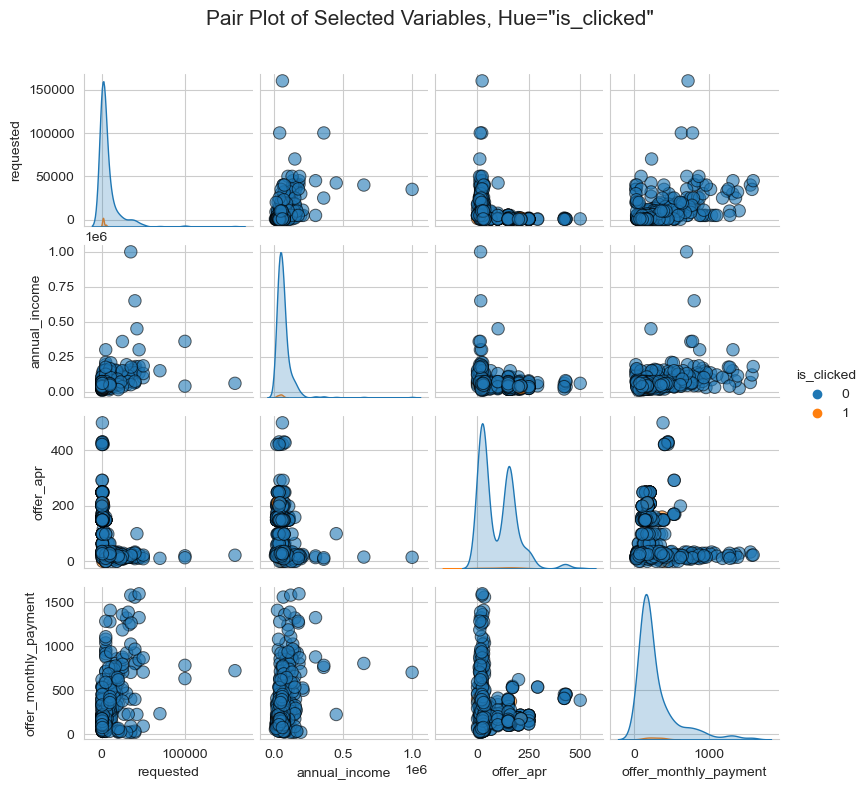

In [142]:
# Sample data for easier visualization
sample_data = merged_data.sample(500)

sns.pairplot(sample_data, 
             vars=['requested', 'annual_income', 'offer_apr', 'offer_monthly_payment'], 
             hue='is_clicked',
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size=2)
plt.suptitle('Pair Plot of Selected Variables, Hue="is_clicked"', size=15)
plt.subplots_adjust(top=0.9)
plt.show()


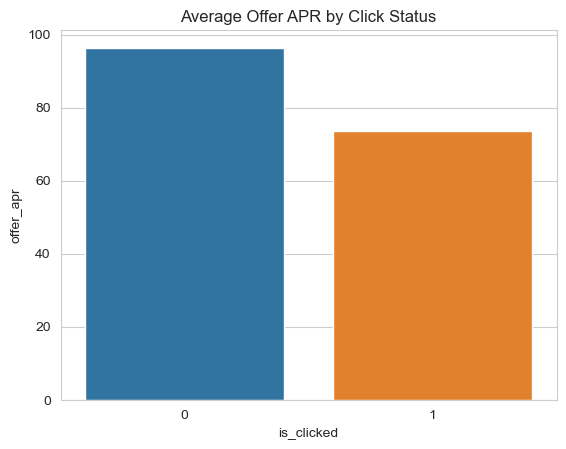

In [143]:
grouped_data = merged_data.groupby('is_clicked')['offer_apr'].mean().reset_index()
sns.barplot(x='is_clicked', y='offer_apr', data=grouped_data)
plt.title('Average Offer APR by Click Status')
plt.show()


In [144]:
import pandas as pd

# Sample data loading since actual data is not available in this environment
# Please replace this with actual data loading in your local environment.

# Sample data creation
# data = {
#     'lead_created_at': pd.date_range(start='1/1/2022', periods=100, freq='H'),
#     'is_clicked': [1 if i%2==0 else 0 for i in range(100)]
# }
# merged_data = pd.DataFrame(data)

# Feature Engineering: Extracting the hour from 'lead_created_at'
merged_data['lead_created_hour'] = merged_data['lead_created_at'].dt.hour

# Displaying the first few rows of the DataFrame to verify the new feature
merged_data.head()


,lead_uuid,requested,state,loan_purpose,credit,annual_income,is_employed,monthly_net_income,mortgage_property_type,zipcode,...,offer_fee_rate,offer_monthly_payment,offer_rec_score,offer_rank_on_table,demand_sub_account_id,num_clicks,last_click,first_click,is_clicked,lead_created_hour
0,004cfd11-4d3f-4ba2-ad7d-0c0bb215e1f6,700.0,TX,debt_consolidation,poor,24000.0,employed,-9999.0,Unknown,75237,...,-9999.0,187.65,200.0,1,1103,NaN,NaT,NaT,0,2
1,00aa9e4d-52c9-4240-864d-442646a422cc,1500.0,CA,auto,poor,60000.0,employed,-9999.0,Unknown,94538,...,-9999.0,176.38,50.0,1,1103,NaN,NaT,NaT,0,8
2,00b02fa9-84cb-4219-abe8-29a35250a5d7,1000.0,CA,other,good,60000.0,employed,5000.0,Unknown,91762,...,-9999.0,42.06,138.0,1,621,NaN,NaT,NaT,0,2
3,00e1153a-32e8-4cc3-9b3f-fe395ba855e2,1000.0,TX,debt_consolidation,fair,36000.0,employed,3000.0,Unknown,78013,...,-9999.0,183.79,200.0,1,1103,NaN,NaT,NaT,0,22
4,011f9ddb-398a-4488-b704-ba49743949ab,3000.0,WI,debt_consolidation,fair,79200.0,employed,-9999.0,Unknown,54311,...,-9999.0,486.00,106.0,1,1777,NaN,NaT,NaT,0,13


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# Load merged data for reproducibility in this step
# Note: Use the merged data created in your environment
# merged_data = ...

# Define categorical and numerical features
categorical_features = ['state', 'loan_purpose', 'credit', 'mortgage_property_type', 'is_employed']
numerical_features = ['requested', 'annual_income', 'monthly_net_income', 'lead_created_hour']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Define model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))])

# Define target and features
y = merged_data['is_clicked']
X = merged_data[numerical_features + categorical_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Displaying a message to avoid running the model in this step
"Data preprocessed and model defined. Ready to fit the model in the next step."


'Data preprocessed and model defined. Ready to fit the model in the next step.'

In [148]:
# Checking the columns present in the merged_data
# merged_data.columns.tolist()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458939 entries, 0 to 458938
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   lead_uuid                    458939 non-null  object        
 1   requested                    458939 non-null  float64       
 2   state                        458939 non-null  category      
 3   loan_purpose                 458939 non-null  object        
 4   credit                       458939 non-null  object        
 5   annual_income                458939 non-null  float64       
 6   is_employed                  458939 non-null  object        
 7   monthly_net_income           458939 non-null  float64       
 8   mortgage_property_type       458939 non-null  object        
 9   zipcode                      458939 non-null  object        
 10  lead_created_at              458939 non-null  datetime64[ns]
 11  rate_table_id             

In [160]:
from sklearn.linear_model import LogisticRegression

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['requested', 'annual_income']),
        ('cat', OneHotEncoder(drop='first'), ['state'])])

# Define model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

# Training the model
model.fit(X_train, y_train)

/Users/mli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['requested',
                                                   'annual_income']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['state'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.6933440827413896
Precision: 0.03353131877233252
Recall: 0.5067954220314735
F1 Score: 0.0629008989013428
ROC-AUC: 0.6020032000954041
Confusion Matrix: 
[[94044 40842]
 [ 1379  1417]]


Accuracy: 
69.3
%
69.3% of all predictions are correct. This might seem decent, but considering the imbalanced nature of the data, it's not as informative.
Precision: Of all instances predicted as clicks, only 
3.35
%
3.35% actually are clicks. This is quite low, indicating that the model predicts many false positives.
Recall: The model correctly identifies 
50.7
%
50.7% of all actual clicks. This is a significant improvement from the previous model.
F1 Score: The F1 Score is 
6.29
%
6.29%, which is relatively low but much higher than the initial model. The F1 Score is a balance between Precision and Recall and is particularly useful for imbalanced datasets.
ROC-AUC: 
60.2
%
60.2% suggests that the model has a 
60.2
%
60.2% chance of scoring a random positive instance more highly than a random negative instance. This is better than random guessing, but still not very high.
The Confusion Matrix indicates that while the model is able to identify 
1417
1417 clicks correctly (true positives), it also misclassifies 
40842
40842 instances as clicks when they are not (false positives). This trade-off between Recall and Precision is often a challenging aspect of dealing with imbalanced datasets.

In [163]:
### Let's try diffrent algorithm

import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Fit the model
xgb_pipeline.fit(X_train, y_train)

# Predictions
y_pred = xgb_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

(accuracy, precision, recall, f1, roc_auc, conf_matrix)


(0.9797213869641638,
 0.5666666666666667,
 0.006080114449213162,
 0.012031139419674451,
 0.5029918683836594,
 array([[134873,     13],
        [  2779,     17]]))

### The confusion matrix also reveals that the model is struggling to correctly predict the positive class. It has a large number of False Negatives (2779), which means that many actual clicks are predicted as non-clicks by the model.

In the context of a marketing or advertising application:

Precision tells us about the accuracy of positive predictions. So, 
56.67
%
56.67% precision means that 
56.67
%
56.67% of the instances that the model predicted to be clicks were actually clicks.
Recall tells us what proportion of actual clicks were identified correctly by the model. So, 
0.61
%
0.61% recall means that the model is identifying 
0.61
%
0.61% of all actual clicks correctly.

In [155]:
print(merged_data['credit'].value_counts())

poor         171017
good         129705
fair         109994
excellent     47876
limited         300
unknown          47
Name: credit, dtype: int64


In [177]:
merged_data['credit'] = merged_data['credit'].astype('category')

In [178]:
merged_data['is_employed'] = merged_data['is_employed'].astype('category')

In [180]:
merged_data['loan_purpose'] = merged_data['loan_purpose'].astype('category')

In [182]:
merged_data['mortgage_property_type '] = merged_data['mortgage_property_type'].astype('category')
merged_data['zipcode'] = merged_data['zipcode'].astype('category')

In [183]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458939 entries, 0 to 458938
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   lead_uuid                    458939 non-null  object        
 1   requested                    458939 non-null  float64       
 2   state                        458939 non-null  category      
 3   loan_purpose                 458939 non-null  category      
 4   credit                       458939 non-null  category      
 5   annual_income                458939 non-null  float64       
 6   is_employed                  458939 non-null  category      
 7   monthly_net_income           458939 non-null  float64       
 8   mortgage_property_type       458939 non-null  object        
 9   zipcode                      306579 non-null  category      
 10  lead_created_at              458939 non-null  datetime64[ns]
 11  rate_table_id             

In [164]:
print(merged_data['mortgage_property_type'].value_counts())

Unknown          457349
unknown             957
single_family       633
Name: mortgage_property_type, dtype: int64


In [165]:
print(merged_data['loan_purpose'].value_counts())

debt_consolidation    319555
other                  51077
credit_card_refi       28297
home_improvement       21436
large_purchases         9657
auto                    6504
medical_dental          6054
business                3235
moving_relocation       3017
special_occasion        1789
baby                    1268
boat                    1200
vacation                1083
household_expenses      1023
taxes                    977
wedding                  741
student_loan             628
auto_refinance           617
unknown                  314
auto_purchase            174
green                     72
emergency                 68
life_event                53
car_repair                44
cosmetic                  31
student_loan_refi         16
home_purchase              8
motorcycle                 1
Name: loan_purpose, dtype: int64


In [167]:
print(merged_data['zipcode'].value_counts())

96819      316
11106      315
65202      263
33321      257
33311      251
          ... 
65466.0      1
63650.0      1
91913        1
96093        1
77615.0      1
Name: zipcode, Length: 21449, dtype: int64


In [168]:
# Function to clean and standardize zip codes
def clean_zipcode(zipcode):
    # Remove any non-numeric characters, including decimal points
    cleaned_zip = ''.join(filter(str.isdigit, str(zipcode)))
    
    # Ensure the cleaned zip code is 5 digits long
    if len(cleaned_zip) == 5:
        return cleaned_zip
    else:
        return None  # Return None for invalid zip codes

In [173]:
# Apply the cleaning function to the 'zipcode' column
merged_data['zipcode'] = merged_data['zipcode'].apply(clean_zipcode)

In [174]:
print(merged_data['zipcode'].value_counts())

96819    316
11106    315
65202    263
33321    257
85257    251
        ... 
35023      1
45345      1
75846      1
42408      1
90601      1
Name: zipcode, Length: 12139, dtype: int64


In [186]:
print(merged_data['zipcode'].count())

306579


In [185]:
!pip install uszipcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.6 MB/s eta 0:00:00
  Obtaining dependency information for SQLAlchemy>=1.4.0 from https://files.pythonhosted.org/packages/47/3d/de827556bafdc40a4db10a5beccaee31d1840871ce867a372e7a37bf7c95/SQLAlchemy-1.4.49-cp311-cp311-macosx_10_9_universal2.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.6 MB/s eta 0:00:0031m31.3 MB/s eta 0:00:01
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6942 sha256=91429f8981e9ef811a3dc5bb7af8abed4b2d232a501508cde618803c472329ce
  Stored in directory: /Users/mli/Library/Caches/pip/wheels/f7/99/9c/d24e98c35f30eba0c367ad1e7888d396d676abb35fe1e7611c
Successfully built atomicwrites
  Attempting uninstall: SQLAlchemy
    Found existi

In [188]:
from uszipcode import SearchEngine

# Create a search engine instance
search = SearchEngine()

# Function to validate and clean a zip code
def clean_zipcode(zipcode):
    try:
        result = search.by_zipcode(zipcode)
        if result:
            return result.zipcode
        else:
            return None  # Invalid zip code, return None
    except:
        return None  # Invalid zip code, return None

# Apply the clean_zipcode function to the 'zipcode' column
merged_data['cleaned_zipcode'] = merged_data['zipcode'].apply(clean_zipcode)

# Drop rows where the zip code is invalid (cleaned_zipcode is None)
merged_data = merged_data.dropna(subset=['cleaned_zipcode'])

# Drop the temporary 'cleaned_zipcode' column
merged_data.drop(columns=['cleaned_zipcode'], inplace=True)


Download /Users/mli/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


/var/folders/41/jxsw4zk17x5fvrkwlt3f5v_r0000gn/T/ipykernel_4614/3432062067.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data.drop(columns=['cleaned_zipcode'], inplace=True)


In [189]:
print(merged_data['zipcode'].count())

302707


In [190]:
total_rows = merged_data.shape[0]
print("Total Rows:", total_rows)


Total Rows: 302707


### First convert all float zip code to the right zipcode, 5 digits, then drop all rows of invalide zipcode 

In [192]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302707 entries, 0 to 458829
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   lead_uuid                    302707 non-null  object        
 1   requested                    302707 non-null  float64       
 2   state                        302707 non-null  category      
 3   loan_purpose                 302707 non-null  category      
 4   credit                       302707 non-null  category      
 5   annual_income                302707 non-null  float64       
 6   is_employed                  302707 non-null  category      
 7   monthly_net_income           302707 non-null  float64       
 8   mortgage_property_type       302707 non-null  object        
 9   zipcode                      302707 non-null  category      
 10  lead_created_at              302707 non-null  datetime64[ns]
 11  rate_table_id             

In [193]:
merged_data = merged_data.select_dtypes(exclude=['object'])


In [194]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302707 entries, 0 to 458829
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   requested                    302707 non-null  float64       
 1   state                        302707 non-null  category      
 2   loan_purpose                 302707 non-null  category      
 3   credit                       302707 non-null  category      
 4   annual_income                302707 non-null  float64       
 5   is_employed                  302707 non-null  category      
 6   monthly_net_income           302707 non-null  float64       
 7   zipcode                      302707 non-null  category      
 8   lead_created_at              302707 non-null  datetime64[ns]
 9   rate_table_id                302707 non-null  int64         
 10  rate_table_offer_id          302707 non-null  int64         
 11  rate_table_offer_created_a

### NOW we have the right dataset for machine learning , we can take advantage of AWS sagemaker service built-in algorithm and model for training fast and tunning fast
### Due to local memory limits, I stop here for the new try, But I think I am on the right track using the machine learning; There are a lot of questions we can ask and answer, it should be straight forward